In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 25.7 MB/s eta 0:00:0000:0100:01


# Tools

In [323]:
def str_to_float(x):
    try:
        return float(x[1:-1])
    except:
        return np.nan
    
def string_column_to_list(column):
    return column.apply(
        lambda x: np.array([float(i) for i in x[1:-1].split(",")]) if x is not np.nan else np.nan
    )# EXPERIMENT 0 - Correlation between LMD and ST from the dataset

# df = pd.read_csv("./data/compounds.csv")
# (
#     spearmanr(df.LMD, df.TRAN, axis=0, nan_policy="omit").correlation, 
#     spearmanr(df.LMD, df.TRAN, axis=0, nan_policy="omit").pvalue
# )

# Experiment 0 - Correlation between LMD and ST from the dataset

In [303]:
df = pd.read_csv("./data/compounds.csv")
(
    spearmanr(df.LMD, df.TRAN, axis=0, nan_policy="omit").correlation, 
    spearmanr(df.LMD, df.TRAN, axis=0, nan_policy="omit").pvalue
)

(-0.01277956200826489, 0.7492488873901397)

In [304]:
df[df["Compound"] == "ponytail"]

Unnamed: 0  Compound  left right      TRAN       LMD
402         403  ponytail  pony  tail  3.533333  6.133333

# Experiment 1 - LMD

In [41]:
df1 = pd.read_csv("./data/Experiment1_LMD.csv", index_col=0)
display(df1.head())
for column in df1.columns:
    if column.endswith("lmd"):

        df1[column] = string_column_to_list(df1[column])

df1.head()
for c in df1.columns:
    print(c)

Compound   left   right      TRAN       LMD  \
0  aboveground  above  ground  6.200000  4.000000   
1      airbase    air    base  4.266667  5.866667   
2     airborne    air   borne  3.857143  3.133333   
3     aircraft    air   craft  4.533333  4.266667   
4     airfield    air   field  4.333333  5.714286   

                         bertlarge_nocontext_all_lmd  \
0  [4.555650949478149, 4.649520218372345, 4.75129...   
1  [4.671908915042877, 4.690265357494354, 4.80878...   
2  [4.812545478343964, 4.821436703205109, 4.85222...   
3  [4.851085543632507, 4.91801381111145, 4.948545...   
4  [5.089533627033234, 4.98510867357254, 4.958004...   

                     bertlarge_nocontext_withcls_lmd  \
0  [4.312079548835754, 4.452655613422394, 4.59542...   
1  [4.506923854351044, 4.551451504230499, 4.72091...   
2  [4.711721241474152, 4.693591594696045, 4.71972...   
3  [4.763181805610657, 4.82411652803421, 4.871140...   
4  [5.134373307228088, 4.955263137817383, 4.91863...   

                      bertlarge_nocontext_nospec_lmd  \
0  [4.048570394515991, 4.107796549797058, 4.20810...   
1  [4.399784505367279, 4.3299901485443115, 4.5135...   
2  [4.62177962064743, 4.605102986097336, 4.559808...   
3  [4.7790127992630005, 4.752368330955505, 4.7162...   
4  [5.089927613735199, 4.884729087352753, 4.82987...   

                            bertlarge_contextual_lmd  \
0  [3.6792556941509247, 3.73639315366745, 3.79268...   
1  [4.297492504119873, 4.437695145606995, 4.66440...   
2  [4.514695107936859, 4.467453062534332, 4.42710...   
3  [4.814960062503815, 4.7888994216918945, 4.7258...   
4  [4.85325887799263, 4.707901030778885, 4.750182...   

                          bertbase_nocontext_all_lmd  \
0  [4.252839088439941, 4.3508875370025635, 4.3554...   
1  [4.4864049553871155, 4.850053191184998, 5.0044...   
2  [4.8895227909088135, 5.0968194007873535, 5.093...   
3  [4.978817701339722, 5.064653158187866, 5.08962...   
4  [4.937725067138672, 4.997314512729645, 5.07070...   

                      bertbase_nocontext_withcls_lmd  \
0  [3.883940279483795, 4.048945307731628, 4.16425...   
1  [4.250430166721344, 4.7929346561431885, 5.0136...   
2  [4.810097515583038, 5.125590562820435, 5.12479...   
3  [5.006275475025177, 5.10873019695282, 5.120574...   
4  [4.88378643989563, 5.007552206516266, 5.103226...   

                       bertbase_nocontext_nospec_lmd  \
0  [3.35807666182518, 3.5267604887485504, 3.66866...   
1  [3.9503154158592224, 4.7180429100990295, 5.059...   
2  [4.669617861509323, 5.017236173152924, 5.06538...   
3  [5.099586099386215, 5.154820382595062, 5.15492...   
4  [4.8350732028484344, 5.019131153821945, 5.2269...   

                             bertbase_contextual_lmd            glove_lmd  
0  [3.1995876133441925, 3.618866056203842, 3.8139...  [5.176485849078745]  
1  [3.8067319989204407, 4.138978868722916, 4.4403...  [5.454429388046265]  
2  [4.618341997265816, 4.313083216547966, 4.35516...  [4.191957041621208]  
3  [5.176374912261963, 5.1303596794605255, 5.2947...  [4.360665380954742]  
4  [4.612725451588631, 4.676985889673233, 4.87647...  [4.356041252613068]

Compound
left
right
TRAN
LMD
bertlarge_nocontext_all_lmd
bertlarge_nocontext_withcls_lmd
bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
bertbase_nocontext_all_lmd
bertbase_nocontext_withcls_lmd
bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
glove_lmd


In [256]:
def columnname2modelname(columnname):
    
    if "bertlarge_nocontext_all" in columnname:
        return "Bert-large NC-all"
    
    if "bertlarge_nocontext_withcls" in columnname:
        return "Bert-large NC-cls"
    
    if "bertlarge_nocontext_nospec" in columnname:
        return "Bert-large NC-nospec"
    
    if "bertlarge_contextual" in columnname:
        return "Bert-large C"
    
    if "bertbase_nocontext_all" in columnname:
        return "Bert-base NC-all"
    
    if "bertbase_nocontext_withcls" in columnname:
        return "Bert-base NC-cls"
    
    if "bertbase_nocontext_nospec" in columnname:
        return "Bert-base NC-nospec"
    
    if "bertbase_contextual" in columnname:
        return "Bert-base C"
    
    if "glove" in columnname:
        return "GloVe"
    
def modelname2title(modelname):
    
    if modelname == "bert":
        return "all models"
    
    if modelname == "bertlarge":
        return "Bert-large"
    
    if modelname == "bertbase":
        return "Bert-base"

def calc_correlation_layers(real_values, layers_values):
    
    # Calculate correlation over layers
    cors = []
    for layer_i in range(layers_values[0].shape[0]):
        layer_i_lmds = [row[layer_i] if row is not np.nan else np.nan for row in layers_values ]
        cor = spearmanr(layer_i_lmds, real_values, axis=0, nan_policy="omit")
        cors.append(cor.correlation)
        
    return cors

def calc_correlation(real_values, pred_values):
    return spearmanr(pred_values, real_values, axis=0, nan_policy="omit").correlation


def calc_mse_layers(real_values, layers_values):
    MSE = (layers_values - real_values) ** 2
    avg_MSE = np.mean(MSE, axis=0)
    
    return avg_MSE

def calc_mse(real_values, pred_values):
    MSE = (pred_values - real_values) ** 2
    avg_MSE = np.mean(MSE, axis=0)
    return avg_MSE


def calc_distance_layers(real_values, layers_values):
    distance = np.abs(layers_values - real_values)
    avg_distance = np.mean(distance, axis=0)
    return avg_distance

def calc_distance(real_values, pred_values):
    distance = np.abs(pred_values - real_values)
    avg_distance = np.mean(distance, axis=0)
    return avg_distance


def calc_binary_layers(real_values, layers_values):

    avg_correct = []
    for layer in range(layers_values[0].shape[0]):

        pred = np.array([p[layer] if p is not np.nan else np.nan for p in layers_values])
        pred_notnan = pred[np.invert(np.isnan(pred))]
        real_notnan = real_values[np.invert(np.isnan(pred))]

        n_correct = sum((pred_notnan < 5) == (real_notnan < 5))

        fraction = n_correct / len(real_notnan)

        avg_correct.append(fraction)

    return avg_correct

def calc_binary(real_values, pred_values):

    prediction_notnan = pred_values[np.invert(np.isnan(pred_values))]
    real_notnan = real_values[np.invert(np.isnan(pred_values))]

    n_correct = sum((prediction_notnan < 5) == (real_notnan < 5))
    fraction_correct = n_correct / len(real_notnan)
    
    return fraction_correct

def calc_binarytran_layers(real_values, layers_values):

    avg_correct = []
    for layer in range(layers_values[0].shape[0]):

        pred = np.array([p[layer] if p is not np.nan else np.nan for p in layers_values])
        pred_notnan = pred[np.invert(np.isnan(pred))]
        real_notnan = real_values[np.invert(np.isnan(pred))]

        n_correct = sum((pred_notnan < 3.5) == (real_notnan < 3.5))

        fraction = n_correct / len(real_notnan)

        avg_correct.append(fraction)

    return avg_correct

def calc_binarytran(real_values, pred_values):

    prediction_notnan = pred_values[np.invert(np.isnan(pred_values))]
    real_notnan = real_values[np.invert(np.isnan(pred_values))]

    n_correct = sum((prediction_notnan < 3.5) == (real_notnan < 3.5))
    fraction_correct = n_correct / len(real_notnan)
    
    return fraction_correct

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.5406747222818304
yea


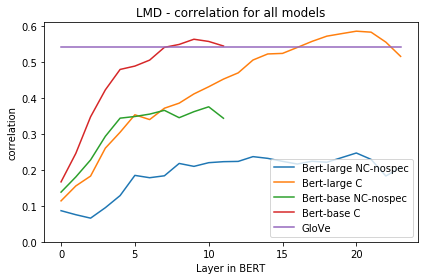

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 1.4477430253542591


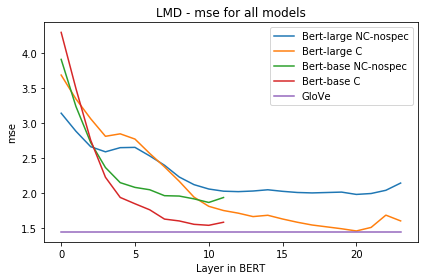

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.9452394997395849


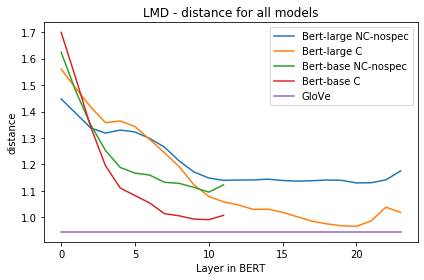

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.7014446227929374


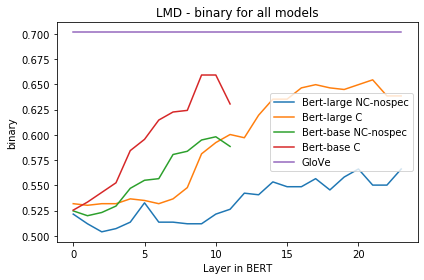

bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.5406747222818304


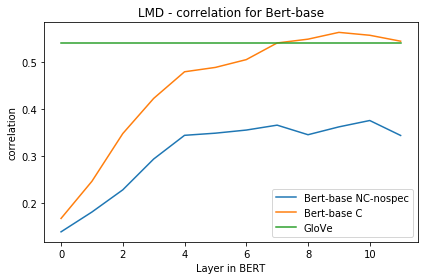

bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 1.4477430253542591


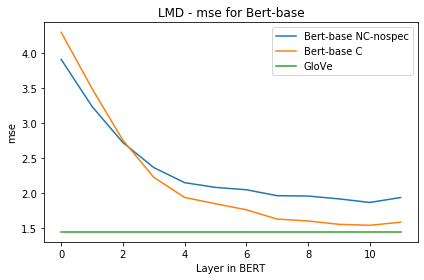

bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.9452394997395849


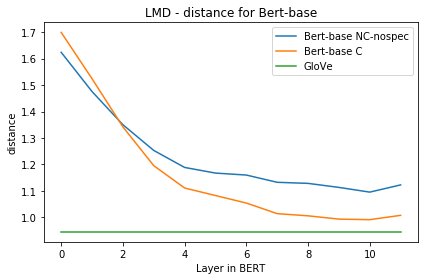

bertbase_nocontext_nospec_lmd
bertbase_contextual_lmd
Glove value: 0.7014446227929374


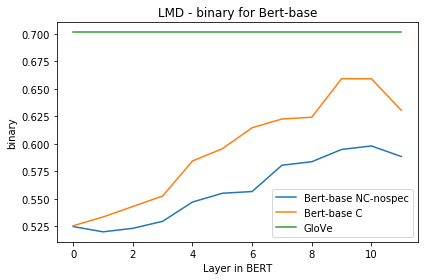

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
Glove value: 0.5406747222818304


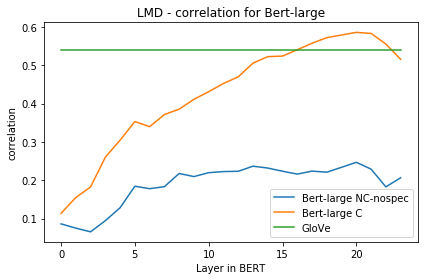

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
Glove value: 1.4477430253542591


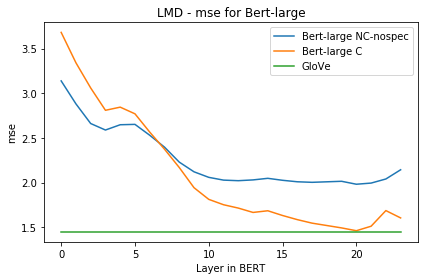

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
Glove value: 0.9452394997395849


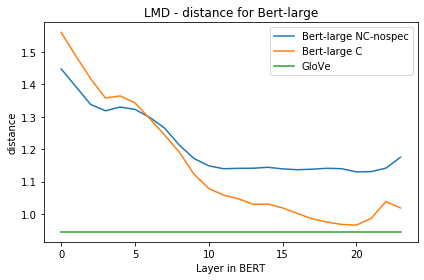

bertlarge_nocontext_nospec_lmd
bertlarge_contextual_lmd
Glove value: 0.7014446227929374


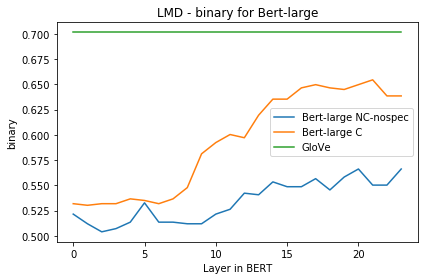

In [21]:
only_plot_columns = [
#                      "bertlarge_nocontext_all_lmd",
#                      "bertlarge_nocontext_withcls_lmd",
                     "bertlarge_nocontext_nospec_lmd",
                     "bertlarge_contextual_lmd",
#                      "bertbase_nocontext_all_lmd",
#                      "bertbase_nocontext_withcls_lmd",
                     "bertbase_nocontext_nospec_lmd",
                     "bertbase_contextual_lmd",
                     "glove_lmd"
                    ]

def make_plot_lmd(df, model, metric_name, metric_single, metric_layered):
    
    for column in df.columns:
        if column.startswith(model) and column in only_plot_columns:
            print(column)
            predictions = df[column]
            real = df["LMD"]
            
            res = metric_layered(real, predictions)

            plt.plot(res, label=columnname2modelname(column))

        if "glove" in column and column in only_plot_columns:

            predictions = df[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
            real = df["LMD"]
            
            res = metric_single(real, predictions)
            
            n_layers = 24 * ("base" not in model) + 12 * ("base" in model)
            plt.plot([res] * n_layers, label=columnname2modelname(column))
            
            print(f"Glove value: {res}")

    
    if metric_name == "correlation" and model == "bert":
        print("yea")
        plt.ylim(0,0.61)

    plt.title(f"LMD - {metric_name} for {modelname2title(model)}")
    plt.xlabel("Layer in BERT")
    plt.ylabel(f"{metric_name}")

    plt.legend()
    plt.tight_layout()
    plt.savefig(f"./plots/LMD_{metric_name}_{model}.pdf")
    plt.show()
    
    return

metrics = [
  ("correlation", calc_correlation, calc_correlation_layers),
  ("mse", calc_mse, calc_mse_layers),
  ("distance", calc_distance, calc_distance_layers),
  ("binary", calc_binary, calc_binary_layers)
]

for model in ["bert", "bertbase", "bertlarge"]:
    for metric_name, metric_single, metric_layered in metrics:
        
        make_plot_lmd(df1, model, metric_name, metric_single, metric_layered)


# Experiment 2 - ST

In [83]:
df2 = pd.read_csv("./data/Experiment2_TRAN.csv", index_col=0)
for column in df2.columns:
    if column.endswith("tran"):

        df2[column] = string_column_to_list(df2[column])
        
display(df2.head())

Compound   left   right      TRAN       LMD  \
0  aboveground  above  ground  6.200000  4.000000   
1      airbase    air    base  4.266667  5.866667   
2     airborne    air   borne  3.857143  3.133333   
3     aircraft    air   craft  4.533333  4.266667   
4     airfield    air   field  4.333333  5.714286   

                  bertlarge_nocontext_all_w=0.0_tran  \
0  [5.598961353302002, 5.939782500267029, 6.23188...   
1  [5.7837512493133545, 5.926817059516907, 6.0935...   
2  [5.616336345672607, 5.969049334526062, 6.28187...   
3  [5.999882936477661, 6.420726180076599, 6.59339...   
4  [5.9912251234054565, 6.26756489276886, 6.47411...   

                  bertlarge_nocontext_all_w=0.1_tran  \
0  [5.652283239364625, 5.981840074062348, 6.26173...   
1  [5.82312217950821, 5.9639852166175835, 6.11654...   
2  [5.6388308882713325, 5.990476930141449, 6.2996...   
3  [6.017752671241761, 6.430564522743225, 6.59956...   
4  [5.9804810881614685, 6.269351851940154, 6.4791...   

                  bertlarge_nocontext_all_w=0.2_tran  \
0  [5.705605125427247, 6.023897647857666, 6.29157...   
1  [5.862493109703064, 6.001153373718262, 6.13948...   
2  [5.661325430870057, 6.011904525756837, 6.31733...   
3  [6.03562240600586, 6.440402865409852, 6.605740...   
4  [5.969737052917481, 6.2711388111114506, 6.4841...   

                  bertlarge_nocontext_all_w=0.3_tran  \
0  [5.758927011489868, 6.065955221652985, 6.32142...   
1  [5.901864039897919, 6.038321530818939, 6.16243...   
2  [5.68381997346878, 6.033332121372222, 6.335072...   
3  [6.053492140769958, 6.450241208076477, 6.61191...   
4  [5.9589930176734915, 6.272925770282745, 6.4892...   

                  bertlarge_nocontext_all_w=0.4_tran  ...  \
0  [5.8122488975524895, 6.108012795448303, 6.3512...  ...   
1  [5.941234970092774, 6.075489687919617, 6.18538...  ...   
2  [5.706314516067504, 6.0547597169876095, 6.3528...  ...   
3  [6.071361875534057, 6.460079550743103, 6.61808...  ...   
4  [5.948248982429504, 6.274712729454041, 6.49427...  ...   

       glove_w=0.1_tran      glove_w=0.2_tran      glove_w=0.3_tran  \
0  [0.9642370049841702]  [0.9430587030947208]  [0.9218804012052715]   
1  [3.6212759494781492]  [3.5667444229125973]  [3.5122128963470463]   
2   [2.507110527157783]  [2.6040756821632387]  [2.7010408371686934]   
3  [3.7837753653526303]  [3.8604955196380617]  [3.9372156739234923]   
4  [2.5915401101112367]   [2.668815159797669]     [2.7460902094841]   

       glove_w=0.4_tran      glove_w=0.5_tran      glove_w=0.6_tran  \
0  [0.9007020993158221]  [0.8795237974263728]  [0.8583454955369234]   
1  [3.4576813697814943]  [3.4031498432159424]  [3.3486183166503904]   
2   [2.798005992174149]  [2.8949711471796036]  [2.9919363021850582]   
3   [4.013935828208924]   [4.090655982494354]   [4.167376136779785]   
4   [2.823365259170532]   [2.900640308856964]   [2.977915358543396]   

       glove_w=0.7_tran      glove_w=0.8_tran      glove_w=0.9_tran  \
0   [0.837167193647474]  [0.8159888917580247]  [0.7948105898685753]   
1  [3.2940867900848385]  [3.2395552635192875]  [3.1850237369537355]   
2  [3.0889014571905133]   [3.185866612195969]  [3.2828317672014236]   
3   [4.244096291065215]   [4.320816445350648]   [4.397536599636078]   
4  [3.0551904082298282]  [3.1324654579162594]   [3.209740507602692]   

       glove_w=1.0_tran  
0   [0.773632287979126]  
1  [3.1304922103881836]  
2  [3.3797969222068787]  
3   [4.474256753921509]  
4  [3.2870155572891235]  

[5 rows x 104 columns]

Glove value: 0.30420692154328727
yea


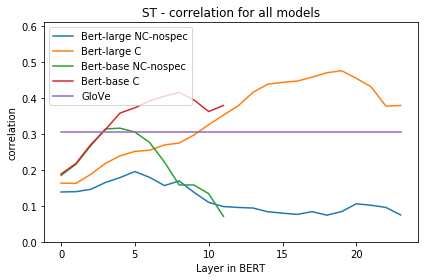

Glove value: 8.529587891774062


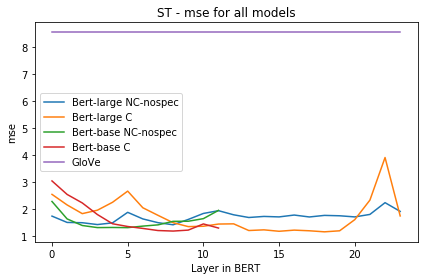

Glove value: 2.657143596740566


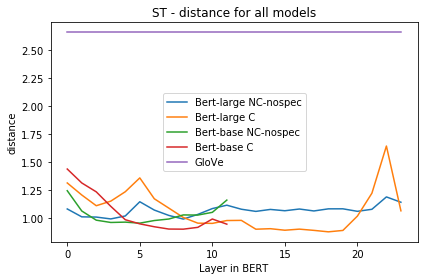

Glove value: 0.2520064205457464


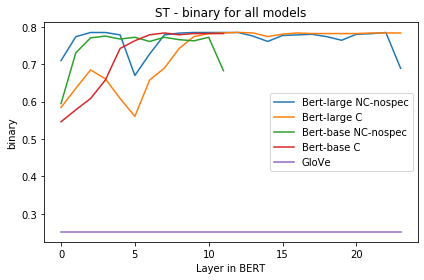

Glove value: 0.30420692154328727


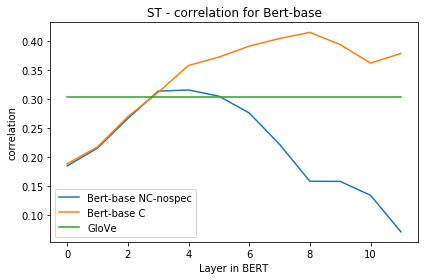

Glove value: 8.529587891774062


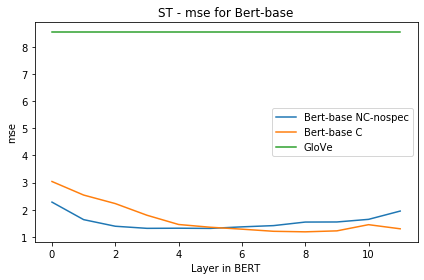

Glove value: 2.657143596740566


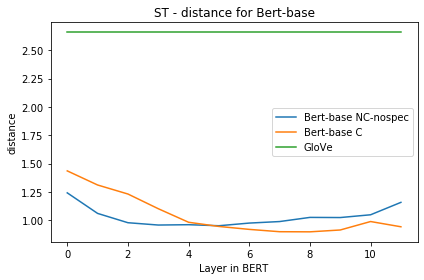

Glove value: 0.2520064205457464


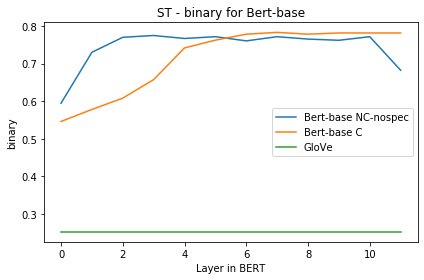

Glove value: 0.30420692154328727


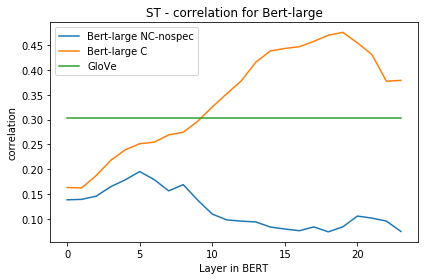

Glove value: 8.529587891774062


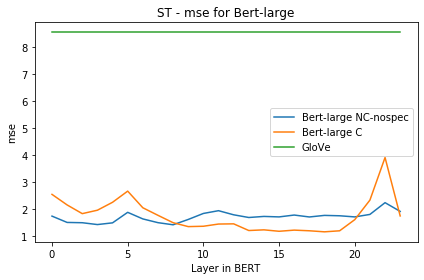

Glove value: 2.657143596740566


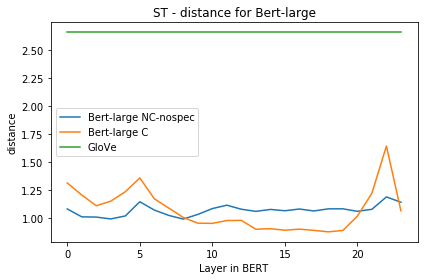

Glove value: 0.2520064205457464


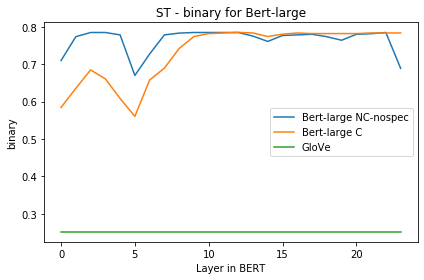

In [20]:
only_plot_columns = [
#                      "bertlarge_nocontext_all_w=0.5_tran",
#                      "bertlarge_nocontext_withcls_w=0.5_tran",
                     "bertlarge_nocontext_nospec_w=0.5_tran",
                     "bertlarge_contextual_w=0.5_tran",
#                      "bertbase_nocontext_all_w=0.5_tran",
#                      "bertbase_nocontext_withcls_w=0.5_tran",
                     "bertbase_nocontext_nospec_w=0.5_tran",
                     "bertbase_contextual_w=0.5_tran",
                     "glove_w=0.5_tran"
                    ]

def make_plot_tran(df, model, metric_name, metric_single, metric_layered):
    
    for column in df.columns:
        if column in only_plot_columns:
            if column.startswith(model) and ("w=0.5" in column):

                predictions = df[column]
                real = df["TRAN"]

                res = metric_layered(real, predictions)

                plt.plot(res, label=columnname2modelname(column))

            if "glove" in column and ("w=0.5" in column):

                predictions = df[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
                real = df["TRAN"]

                res = metric_single(real, predictions)

                n_layers = 24 * ("base" not in model) + 12 * ("base" in model)
                plt.plot([res] * n_layers, label=columnname2modelname(column))

                print(f"Glove value: {res}")

            
    if metric_name == "correlation" and model == "bert":
        print("yea")
        plt.ylim(0,0.61)

    plt.title(f"ST - {metric_name} for {modelname2title(model)}")
    plt.xlabel("Layer in BERT")
    plt.ylabel(f"{metric_name}")

    plt.legend()
    plt.tight_layout()
    plt.savefig(f"./plots/ST_{metric_name}_{model}.pdf")
    plt.show()
    
    return

metrics = [
  ("correlation", calc_correlation, calc_correlation_layers),
  ("mse", calc_mse, calc_mse_layers),
  ("distance", calc_distance, calc_distance_layers),
  ("binary", calc_binarytran, calc_binarytran_layers)
]

for model in ["bert", "bertbase", "bertlarge"]:
    for metric_name, metric_single, metric_layered in metrics:
        
        make_plot_tran(df2, model, metric_name, metric_single, metric_layered)


# Reverse

In [324]:
df3 = pd.read_csv("./data/Experiment3_reversedLMD.csv", index_col=0)
for column in df3.columns:
    if column.endswith("reversedlmd"):

        df3[column] = string_column_to_list(df3[column])
        
    if "contextual" in column or "glove" in column:
        
        df3.drop(column, axis=1, inplace=True)
        
display(df3.head())

def min_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.min)
    
    return dataf
def max_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.max)
    
    return dataf
def mean_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.mean)
    
    return dataf

display((df3.copy()
 .pipe(min_for_each_column)
).describe())
display((df3.copy()
 .pipe(max_for_each_column)
).describe())
display((df3.copy()
 .pipe(mean_for_each_column)
).describe())

Compound   left   right      TRAN       LMD  \
0  aboveground  above  ground  6.200000  4.000000   
1      airbase    air    base  4.266667  5.866667   
2     airborne    air   borne  3.857143  3.133333   
3     aircraft    air   craft  4.533333  4.266667   
4     airfield    air   field  4.333333  5.714286   

                 bertlarge_nocontext_all_reversedlmd  \
0  [5.533731281757355, 5.370229780673981, 5.27618...   
1  [5.438000857830048, 5.228647291660309, 5.22802...   
2  [5.661677718162537, 5.416758358478546, 5.32923...   
3  [5.49577921628952, 5.2706992626190186, 5.23940...   
4  [5.435724258422852, 5.298644006252289, 5.27111...   

             bertlarge_nocontext_withcls_reversedlmd  \
0  [5.8483704924583435, 5.582481324672699, 5.4484...   
1  [5.678988099098206, 5.339428186416626, 5.34192...   
2  [6.041505038738251, 5.689026117324829, 5.55649...   
3  [5.802067518234253, 5.444694757461548, 5.39454...   
4  [5.723646283149719, 5.475906729698181, 5.43896...   

              bertlarge_nocontext_nospec_reversedlmd  \
0  [6.271201819181442, 5.938230007886887, 5.81081...   
1  [6.008327901363373, 5.5305057764053345, 5.5878...   
2  [6.593129634857178, 6.167676746845245, 6.01855...   
3  [6.228173673152924, 5.760385990142822, 5.75739...   
4  [6.157091856002808, 5.805177986621857, 5.82928...   

                  bertbase_nocontext_all_reversedlmd  \
0  [6.045151054859161, 5.724840462207794, 5.76237...   
1  [5.780268907546997, 5.705758333206177, 5.69912...   
2  [5.855607092380524, 5.673831105232239, 5.60771...   
3  [5.808293521404266, 5.692606568336487, 5.68902...   
4  [5.682433843612671, 5.620509088039398, 5.67860...   

              bertbase_nocontext_withcls_reversedlmd  \
0  [6.491784304380417, 6.051478087902069, 5.96633...   
1  [6.189929842948914, 6.0820189118385315, 5.9195...   
2  [6.276169419288635, 6.043297052383423, 5.79695...   
3  [6.233707964420319, 6.054456532001495, 5.90339...   
4  [6.028581857681274, 5.9500837326049805, 5.8849...   

               bertbase_nocontext_nospec_reversedlmd  
0  [7.087058573961258, 6.597388535737991, 6.49390...  
1  [6.726861298084259, 6.707792431116104, 6.50454...  
2  [6.864887475967407, 6.669636368751526, 6.33998...  
3  [6.76941305398941, 6.641976684331894, 6.462136...  
4  [6.512047350406647, 6.502224802970886, 6.39735...

TRAN         LMD  bertlarge_nocontext_all_reversedlmd  \
count  628.000000  628.000000                           627.000000   
mean     4.536891    5.075251                             4.916156   
std      1.198767    1.432273                             0.246399   
min      1.400000    1.400000                             3.586040   
25%      3.642857    4.142857                             4.785809   
50%      4.571429    5.133333                             4.953423   
75%      5.571429    6.066667                             5.100826   
max      6.769231    8.933333                             5.489636   

       bertlarge_nocontext_withcls_reversedlmd  \
count                               627.000000   
mean                                  4.914437   
std                                   0.281095   
min                                   3.342304   
25%                                   4.754949   
50%                                   4.939265   
75%                                   5.122733   
max                                   5.653757   

       bertlarge_nocontext_nospec_reversedlmd  \
count                              627.000000   
mean                                 4.938286   
std                                  0.400078   
min                                  3.084831   
25%                                  4.713203   
50%                                  4.982017   
75%                                  5.229206   
max                                  6.314130   

       bertbase_nocontext_all_reversedlmd  \
count                          627.000000   
mean                             5.114433   
std                              0.293780   
min                              3.793201   
25%                              4.943078   
50%                              5.145286   
75%                              5.312476   
max                              6.063169   

       bertbase_nocontext_withcls_reversedlmd  \
count                              627.000000   
mean                                 5.131755   
std                                  0.320376   
min                                  3.773213   
25%                                  4.944400   
50%                                  5.160736   
75%                                  5.344924   
max                                  6.074378   

       bertbase_nocontext_nospec_reversedlmd  
count                             627.000000  
mean                                5.283578  
std                                 0.445569  
min                                 3.435636  
25%                                 5.019336  
50%                                 5.315815  
75%                                 5.551428  
max                                 6.691236

TRAN         LMD  bertlarge_nocontext_all_reversedlmd  \
count  628.000000  628.000000                           627.000000   
mean     4.536891    5.075251                             5.654982   
std      1.198767    1.432273                             0.242670   
min      1.400000    1.400000                             4.875394   
25%      3.642857    4.142857                             5.518177   
50%      4.571429    5.133333                             5.651685   
75%      5.571429    6.066667                             5.780646   
max      6.769231    8.933333                             6.671644   

       bertlarge_nocontext_withcls_reversedlmd  \
count                               627.000000   
mean                                  5.901040   
std                                   0.319121   
min                                   4.772753   
25%                                   5.705149   
50%                                   5.920832   
75%                                   6.097767   
max                                   7.014180   

       bertlarge_nocontext_nospec_reversedlmd  \
count                              627.000000   
mean                                 6.270107   
std                                  0.434786   
min                                  4.338762   
25%                                  6.022407   
50%                                  6.305123   
75%                                  6.552672   
max                                  7.558154   

       bertbase_nocontext_all_reversedlmd  \
count                          627.000000   
mean                             5.813563   
std                              0.291174   
min                              4.508806   
25%                              5.661494   
50%                              5.817949   
75%                              5.973500   
max                              7.318096   

       bertbase_nocontext_withcls_reversedlmd  \
count                              627.000000   
mean                                 6.151611   
std                                  0.376338   
min                                  4.511674   
25%                                  5.956101   
50%                                  6.184235   
75%                                  6.381748   
max                                  7.342988   

       bertbase_nocontext_nospec_reversedlmd  
count                             627.000000  
mean                                6.607740  
std                                 0.510646  
min                                 4.219202  
25%                                 6.364852  
50%                                 6.666041  
75%                                 6.927622  
max                                 8.017034

TRAN         LMD  bertlarge_nocontext_all_reversedlmd  \
count  628.000000  628.000000                           627.000000   
mean     4.536891    5.075251                             5.225111   
std      1.198767    1.432273                             0.171619   
min      1.400000    1.400000                             4.454814   
25%      3.642857    4.142857                             5.115941   
50%      4.571429    5.133333                             5.224597   
75%      5.571429    6.066667                             5.335052   
max      6.769231    8.933333                             5.841054   

       bertlarge_nocontext_withcls_reversedlmd  \
count                               627.000000   
mean                                  5.314011   
std                                   0.217490   
min                                   4.301823   
25%                                   5.177520   
50%                                   5.324111   
75%                                   5.446143   
max                                   6.076069   

       bertlarge_nocontext_nospec_reversedlmd  \
count                              627.000000   
mean                                 5.521300   
std                                  0.321579   
min                                  3.892751   
25%                                  5.345150   
50%                                  5.542831   
75%                                  5.714896   
max                                  6.646210   

       bertbase_nocontext_all_reversedlmd  \
count                          627.000000   
mean                             5.387398   
std                              0.241764   
min                              4.203725   
25%                              5.256681   
50%                              5.387952   
75%                              5.516345   
max                              6.241736   

       bertbase_nocontext_withcls_reversedlmd  \
count                              627.000000   
mean                                 5.477094   
std                                  0.275473   
min                                  4.118657   
25%                                  5.330799   
50%                                  5.478757   
75%                                  5.624716   
max                                  6.413085   

       bertbase_nocontext_nospec_reversedlmd  
count                             627.000000  
mean                                5.779067  
std                                 0.399823  
min                                 3.727784  
25%                                 5.577378  
50%                                 5.794411  
75%                                 6.012767  
max                                 6.951690

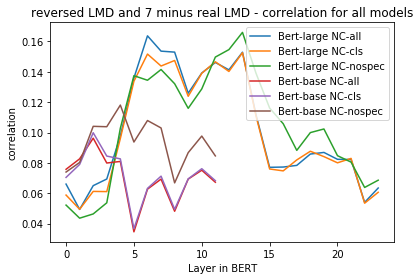

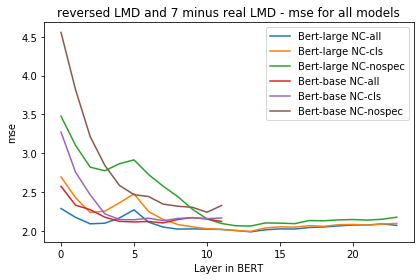

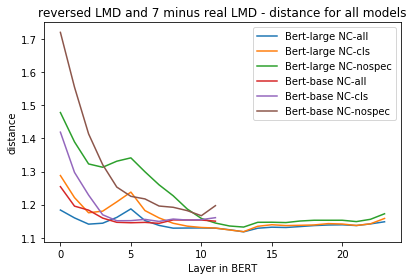

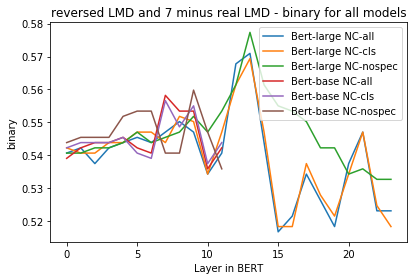

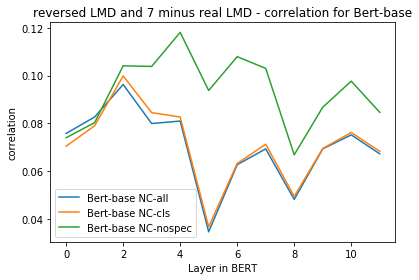

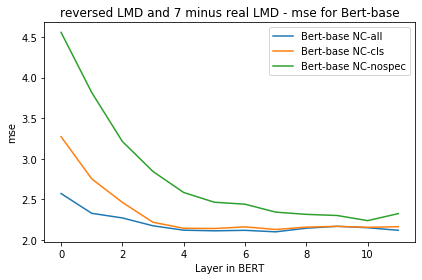

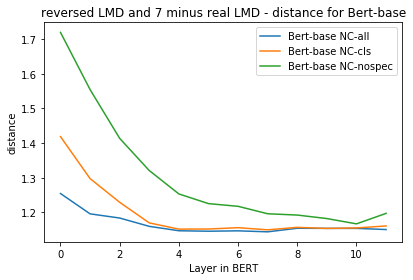

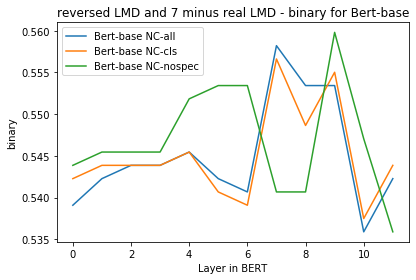

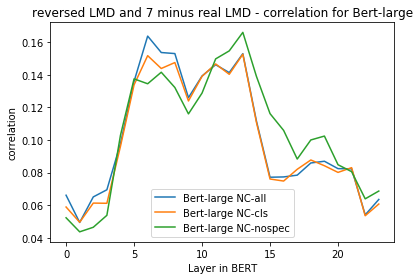

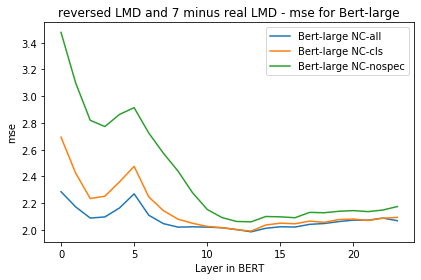

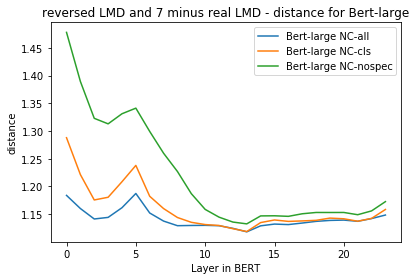

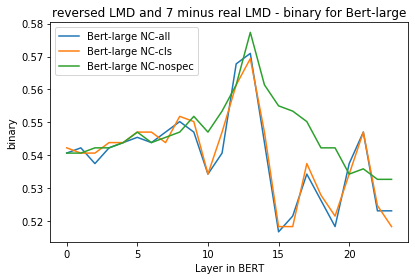

In [59]:
def make_plot_reversedlmd(df, model, metric_name, metric_single, metric_layered):
    
    for column in df.columns:
        if column.startswith(model):

            predictions = df[column]
#             real = 7 - df["LMD"]
            real = df["LMD"]
            
            res = metric_layered(real, predictions)

            plt.plot(res, label=columnname2modelname(column))

        if "glove" in column:

            predictions = df[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
#             real = 7 - df["LMD"]
            real = df["LMD"]
            
            res = metric_single(real, predictions)
            
            n_layers = 24 * ("base" not in model) + 12 * ("base" in model)
            plt.plot([res] * n_layers, label=columnname2modelname(column))



    plt.title(f"reversed LMD and 7 minus real LMD - {metric_name} for {modelname2title(model)}")
    plt.xlabel("Layer in BERT")
    plt.ylabel(f"{metric_name}")

    plt.legend()
    plt.tight_layout()
#     plt.savefig(f"./plots/reversedLMD7Minus_{metric_name}_{model}.pdf")
    plt.savefig(f"./plots/reversedLMD_{metric_name}_{model}.pdf")
    plt.show()
    
    return

metrics = [
  ("correlation", calc_correlation, calc_correlation_layers),
  ("mse", calc_mse, calc_mse_layers),
  ("distance", calc_distance, calc_distance_layers),
  ("binary", calc_binary, calc_binary_layers)
]

for model in ["bert", "bertbase", "bertlarge"]:
    for metric_name, metric_single, metric_layered in metrics:
        
        make_plot_reversedlmd(df3, model, metric_name, metric_single, metric_layered)


bertbase_nocontext_all_reversedlmd 0.09630926105093227
bertbase_nocontext_withcls_reversedlmd 0.09989219026921677
bertbase_nocontext_nospec_reversedlmd 0.11811757727997432


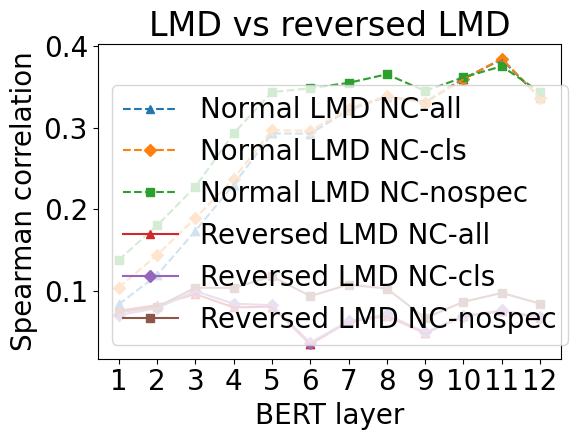

In [325]:
# plot vs normal LMD values
import matplotlib.lines as mlines

columns_lmd = [
    "bertbase_nocontext_all_lmd",
    "bertbase_nocontext_withcls_lmd",
    "bertbase_nocontext_nospec_lmd",
    
]


columns_reversedlmd = [
    "bertbase_nocontext_all_reversedlmd",
    "bertbase_nocontext_withcls_reversedlmd",
    "bertbase_nocontext_nospec_reversedlmd",
    
]

pooling_markers = [
    "^",
    "D",
    "s"
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
]

legend_handles = []

df = df1
color_i = 0
for i, column in enumerate(columns_lmd):

    predictions = df[column]
#     real = 7 - df["LMD"]
    real = df["LMD"]

    res = calc_correlation_layers(real, predictions)
    
    color = colors[color_i]
    color_i += 1
    marker = pooling_markers[i]
    linestyle = "dashed"#(0, (5, 1))
    label = "Normal LMD "+columnname2modelname(column)[10:]

    plt.plot(range(1,13), res, label=label,
            linestyle=linestyle,
            color = color
            )
    plt.scatter(range(1,13), res, 
                marker=marker,
               color = color)
    
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    

df = df3
for i, column in enumerate(columns_reversedlmd):

    predictions = df[column]
#     real = 7 - df["LMD"]
    real = df["LMD"]

    res = calc_correlation_layers(real, predictions)
    
    print(column, np.max(res))
    
    
    color = colors[color_i]
    color_i += 1
    marker = pooling_markers[i]
    linestyle = "solid"
    label = "Reversed LMD "+columnname2modelname(column)[10:]
    
    plt.plot(range(1,13), res, label=label,
            linestyle=linestyle,
            color = color
            )
    plt.scatter(range(1,13), res, 
                marker=marker,
               color = color)
    
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    


#     if "glove" in column:

#         predictions = df[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
#         real = df["LMD"]

#         res = calc_correlation(real, predictions)

#         n_layers = 24 * ("base" not in model) + 12 * ("base" in model)
#         plt.plot([res] * n_layers, label=columnname2modelname(column))



plt.title(f"LMD vs reversed LMD")
plt.xlabel("BERT layer")
# plt.ylabel(f"Correlation with 7 minus real LMD")
plt.ylabel(f"Spearman correlation")

plt.legend(handles=legend_handles)
plt.tight_layout()
plt.xticks(range(1,13))
# plt.savefig(f"./plots/7MinusNormalVSReversedBertBase.pdf")
# plt.savefig(f"./plots/NormalVSReversedBertBase.pdf")
plt.show()


# Experiment 4 - weighted ST

In [107]:
df4 = pd.read_csv("./data/Experiment2_TRAN.csv", index_col=0)
for column in df4.columns:
    if column.endswith("tran"):

        df4[column] = string_column_to_list(df4[column])
        

def min_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.min)
    
    return dataf
def max_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.max)
    
    return dataf
def mean_for_each_column(dataf):
    
    for column in dataf.columns:
        
        if type(dataf[column].iloc[0]).__module__ == np.__name__:
            dataf[column] = dataf[column].apply(np.mean)
    
    return dataf

display((df2.copy()
 .pipe(min_for_each_column)
).describe())
display((df2.copy()
 .pipe(max_for_each_column)
).describe())
display((df2.copy()
 .pipe(mean_for_each_column)
).describe())
        
display(df4.head())

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            4.748217   
std      1.198767    1.432273                            0.584676   
min      1.400000    1.400000                            2.625325   
25%      3.642857    4.142857                            4.313587   
50%      4.571429    5.133333                            4.713235   
75%      5.571429    6.066667                            5.158628   
max      6.769231    8.933333                            6.041756   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             4.789276                            4.827543   
std                              0.564385                            0.548892   
min                              2.696343                            2.767361   
25%                              4.379352                            4.437211   
50%                              4.757402                            4.790111   
75%                              5.194900                            5.237042   
max                              6.006977                            6.002963   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             4.862795                            4.893316   
std                              0.538016                            0.531269   
min                              2.838379                            2.909397   
25%                              4.482690                            4.513092   
50%                              4.822893                            4.857581   
75%                              5.249683                            5.269296   
max                              6.051948                            6.100933   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             4.918157                            4.937326   
std                              0.528696                            0.529510   
min                              2.980415                            3.051433   
25%                              4.549267                            4.579583   
50%                              4.887329                            4.928000   
75%                              5.301312                            5.326162   
max                              6.119228                            6.127529   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             4.952296  ...          1.884890   
std                              0.534388  ...          0.978229   
min                              3.047212  ...         -1.046719   
25%                              4.594278  ...          1.199456   
50%                              4.952520  ...          1.767363   
75%                              5.346785  ...          2.500513   
max                              6.172277  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            6.363920   
std      1.198767    1.432273                            0.222789   
min      1.400000    1.400000                            5.707348   
25%      3.642857    4.142857                            6.218360   
50%      4.571429    5.133333                            6.351205   
75%      5.571429    6.066667                            6.532765   
max      6.769231    8.933333                            6.825625   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             6.373678                            6.384054   
std                              0.213844                            0.205668   
min                              5.764973                            5.822599   
25%                              6.233921                            6.249702   
50%                              6.361924                            6.372514   
75%                              6.535211                            6.536731   
max                              6.822668                            6.828833   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             6.395137                            6.406911   
std                              0.197983                            0.190991   
min                              5.880224                            5.900838   
25%                              6.267289                            6.289397   
50%                              6.385065                            6.399430   
75%                              6.544338                            6.550198   
max                              6.836636                            6.844439   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             6.419474                            6.433462   
std                              0.184639                            0.178644   
min                              5.917197                            5.933556   
25%                              6.307444                            6.328519   
50%                              6.415626                            6.435742   
75%                              6.550088                            6.555914   
max                              6.852242                            6.860046   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             6.448780  ...          1.884890   
std                              0.173049  ...          0.978229   
min                              5.949915  ...         -1.046719   
25%                              6.351628  ...          1.199456   
50%                              6.452112  ...          1.767363   
75%                              6.563757  ...          2.500513   
max                              6.867849  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            5.737439   
std      1.198767    1.432273                            0.370199   
min      1.400000    1.400000                            4.728353   
25%      3.642857    4.142857                            5.496591   
50%      4.571429    5.133333                            5.698844   
75%      5.571429    6.066667                            5.985926   
max      6.769231    8.933333                            6.598392   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             5.755408                            5.773376   
std                              0.355174                            0.341810   
min                              4.786912                            4.828504   
25%                              5.526916                            5.554555   
50%                              5.721912                            5.742982   
75%                              5.991165                            6.006526   
max                              6.583429                            6.568466   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             5.791345                            5.809313   
std                              0.330310                            0.320874   
min                              4.870095                            4.879389   
25%                              5.581062                            5.604348   
50%                              5.766738                            5.791627   
75%                              6.018071                            6.010985   
max                              6.576259                            6.593753   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             5.827282                            5.845250   
std                              0.313688                            0.308909   
min                              4.882782                            4.886175   
25%                              5.628832                            5.643879   
50%                              5.816359                            5.842677   
75%                              6.030315                            6.044228   
max                              6.611246                            6.628739   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             5.863219  ...          1.884890   
std                              0.306650  ...          0.978229   
min                              4.889568  ...         -1.046719   
25%                              5.660575  ...          1.199456   
50%                              5.859455  ...          1.767363   
75%                              6.073425  ...          2.500513   
max                              6.646233  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

Compound   left   right      TRAN       LMD  \
0  aboveground  above  ground  6.200000  4.000000   
1      airbase    air    base  4.266667  5.866667   
2     airborne    air   borne  3.857143  3.133333   
3     aircraft    air   craft  4.533333  4.266667   
4     airfield    air   field  4.333333  5.714286   

                  bertlarge_nocontext_all_w=0.0_tran  \
0  [5.598961353302002, 5.939782500267029, 6.23188...   
1  [5.7837512493133545, 5.926817059516907, 6.0935...   
2  [5.616336345672607, 5.969049334526062, 6.28187...   
3  [5.999882936477661, 6.420726180076599, 6.59339...   
4  [5.9912251234054565, 6.26756489276886, 6.47411...   

                  bertlarge_nocontext_all_w=0.1_tran  \
0  [5.652283239364625, 5.981840074062348, 6.26173...   
1  [5.82312217950821, 5.9639852166175835, 6.11654...   
2  [5.6388308882713325, 5.990476930141449, 6.2996...   
3  [6.017752671241761, 6.430564522743225, 6.59956...   
4  [5.9804810881614685, 6.269351851940154, 6.4791...   

                  bertlarge_nocontext_all_w=0.2_tran  \
0  [5.705605125427247, 6.023897647857666, 6.29157...   
1  [5.862493109703064, 6.001153373718262, 6.13948...   
2  [5.661325430870057, 6.011904525756837, 6.31733...   
3  [6.03562240600586, 6.440402865409852, 6.605740...   
4  [5.969737052917481, 6.2711388111114506, 6.4841...   

                  bertlarge_nocontext_all_w=0.3_tran  \
0  [5.758927011489868, 6.065955221652985, 6.32142...   
1  [5.901864039897919, 6.038321530818939, 6.16243...   
2  [5.68381997346878, 6.033332121372222, 6.335072...   
3  [6.053492140769958, 6.450241208076477, 6.61191...   
4  [5.9589930176734915, 6.272925770282745, 6.4892...   

                  bertlarge_nocontext_all_w=0.4_tran  ...  \
0  [5.8122488975524895, 6.108012795448303, 6.3512...  ...   
1  [5.941234970092774, 6.075489687919617, 6.18538...  ...   
2  [5.706314516067504, 6.0547597169876095, 6.3528...  ...   
3  [6.071361875534057, 6.460079550743103, 6.61808...  ...   
4  [5.948248982429504, 6.274712729454041, 6.49427...  ...   

       glove_w=0.1_tran      glove_w=0.2_tran      glove_w=0.3_tran  \
0  [0.9642370049841702]  [0.9430587030947208]  [0.9218804012052715]   
1  [3.6212759494781492]  [3.5667444229125973]  [3.5122128963470463]   
2   [2.507110527157783]  [2.6040756821632387]  [2.7010408371686934]   
3  [3.7837753653526303]  [3.8604955196380617]  [3.9372156739234923]   
4  [2.5915401101112367]   [2.668815159797669]     [2.7460902094841]   

       glove_w=0.4_tran      glove_w=0.5_tran      glove_w=0.6_tran  \
0  [0.9007020993158221]  [0.8795237974263728]  [0.8583454955369234]   
1  [3.4576813697814943]  [3.4031498432159424]  [3.3486183166503904]   
2   [2.798005992174149]  [2.8949711471796036]  [2.9919363021850582]   
3   [4.013935828208924]   [4.090655982494354]   [4.167376136779785]   
4   [2.823365259170532]   [2.900640308856964]   [2.977915358543396]   

       glove_w=0.7_tran      glove_w=0.8_tran      glove_w=0.9_tran  \
0   [0.837167193647474]  [0.8159888917580247]  [0.7948105898685753]   
1  [3.2940867900848385]  [3.2395552635192875]  [3.1850237369537355]   
2  [3.0889014571905133]   [3.185866612195969]  [3.2828317672014236]   
3   [4.244096291065215]   [4.320816445350648]   [4.397536599636078]   
4  [3.0551904082298282]  [3.1324654579162594]   [3.209740507602692]   

       glove_w=1.0_tran  
0   [0.773632287979126]  
1  [3.1304922103881836]  
2  [3.3797969222068787]  
3   [4.474256753921509]  
4  [3.2870155572891235]  

[5 rows x 104 columns]

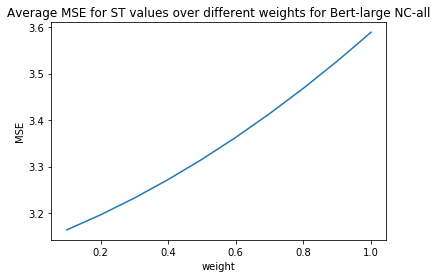

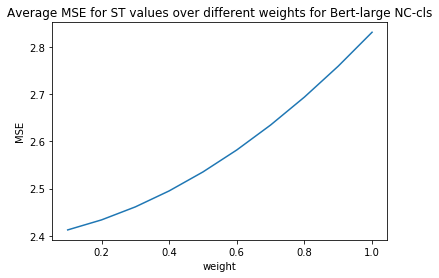

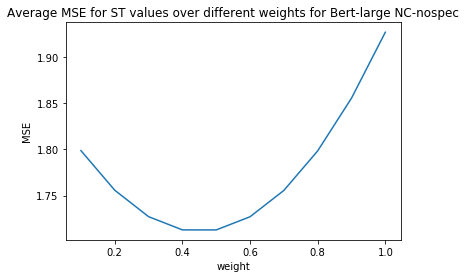

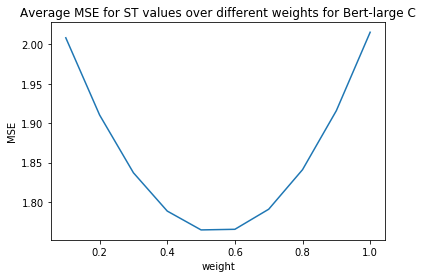

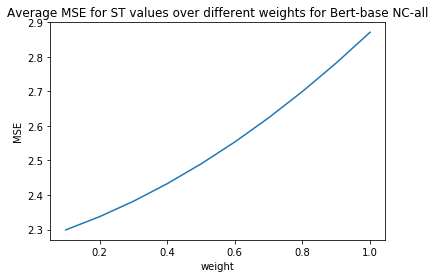

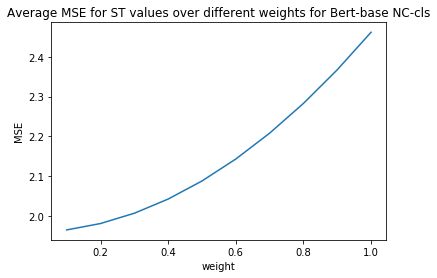

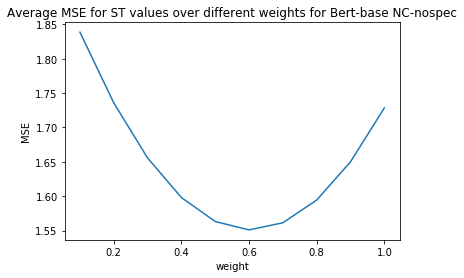

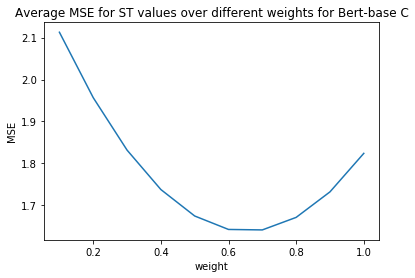

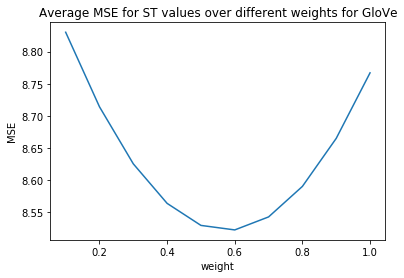

In [56]:
df = df4

tran_scores_all = {} # model -> weight -> mse

for column in df.columns:
    if '=' in column:
        model_raw, weight_raw = column.split('=')
        model = model_raw[:-2]
        weight = float(weight_raw[:3])
        
        predictions = df[column]
        real = df["TRAN"]
        
        mse = np.mean(calc_mse_layers(real, predictions))
        
        if model not in tran_scores_all.keys():
            tran_scores_all[model] = {}
        else:
            tran_scores_all[model][weight] = mse
        
for model, weights in tran_scores_all.items():
    
    plt.plot(list(weights.keys()), list(weights.values()))
    
    plt.title(f"Average MSE for ST values over different weights for {columnname2modelname(model)}")
    plt.xlabel("weight")
    plt.ylabel("MSE")
    plt.savefig(f"./plots/weightedST_{model}.pdf")
    plt.show()

In [68]:
# Plot with or the best version of the model with correlation on Y axis and weight on X axis? 
# You can have one including all the laeyrs (one line each) and one only including the best layer.

df = df4

tran_scores_all = {} # model -> weight -> mse

for column in df.columns:
    if '=' in column:
        model_raw, weight_raw = column.split('=')
        model = model_raw[:-2]
        weight = float(weight_raw[:3])
        
        predictions = df[column]
        real = df["TRAN"]
        
        correlation = calc_correlation_layers(real, predictions)

        if model not in tran_scores_all.keys():
            tran_scores_all[model] = {}
        else:
            tran_scores_all[model][weight] = correlation


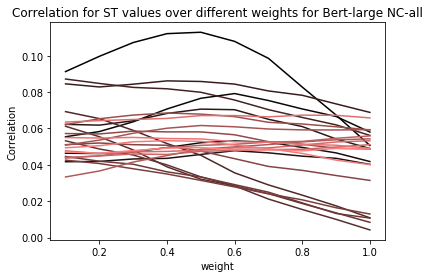

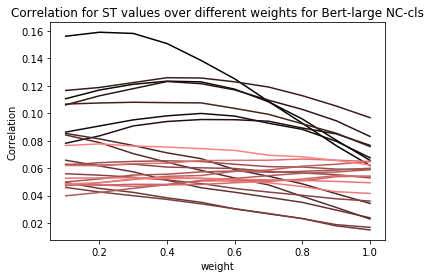

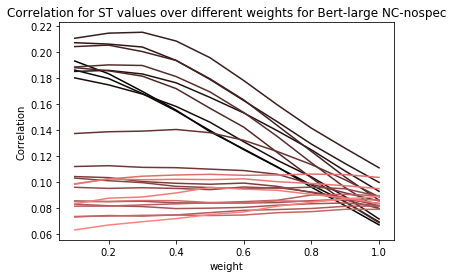

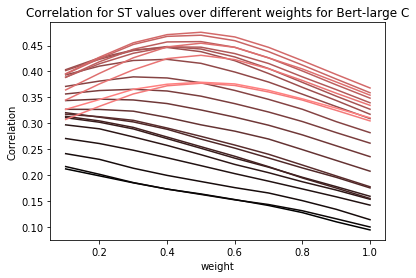

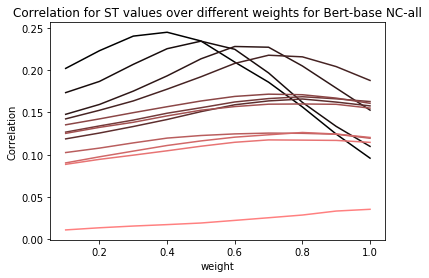

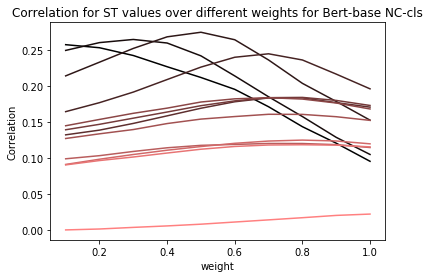

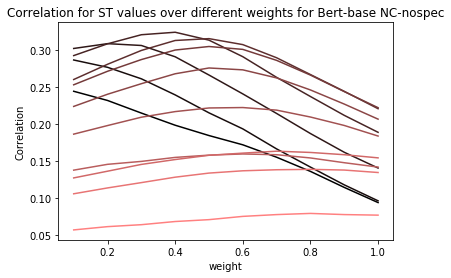

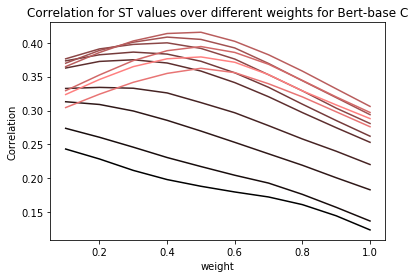

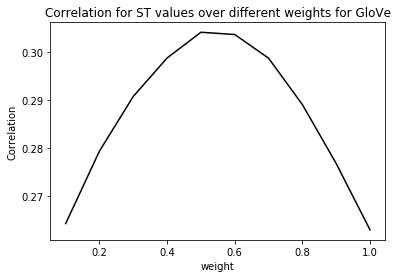

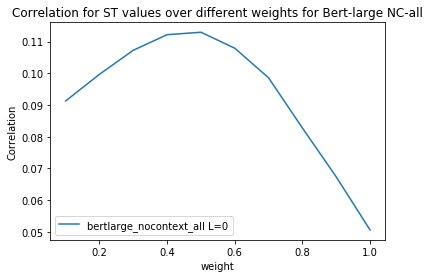

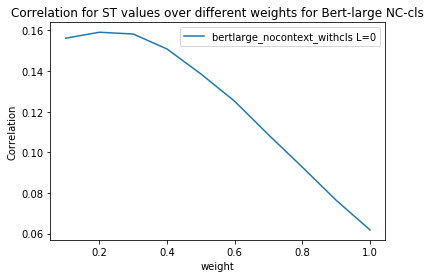

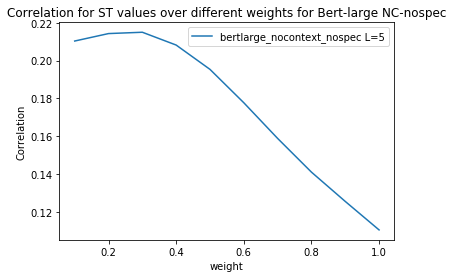

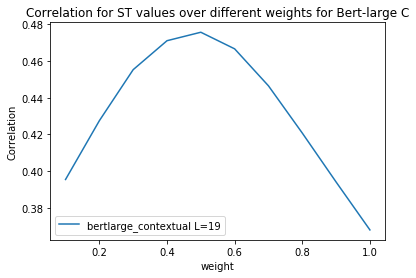

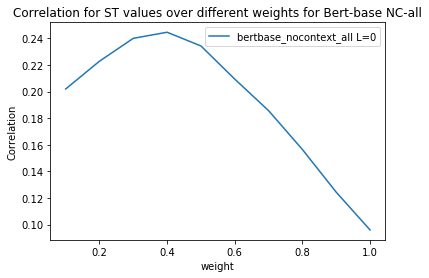

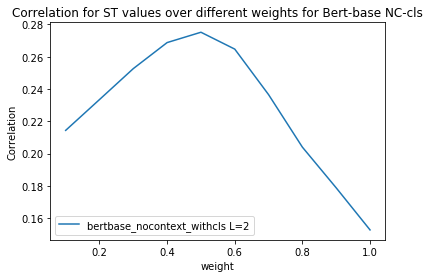

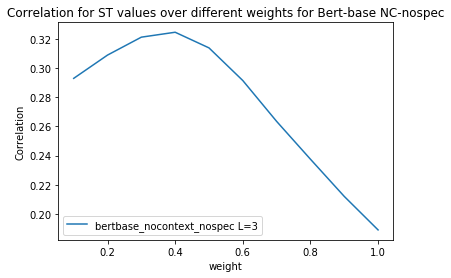

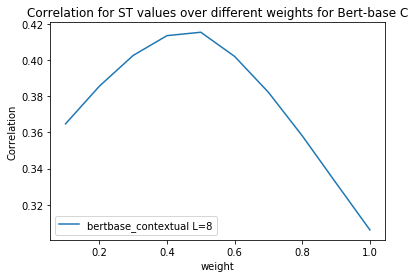

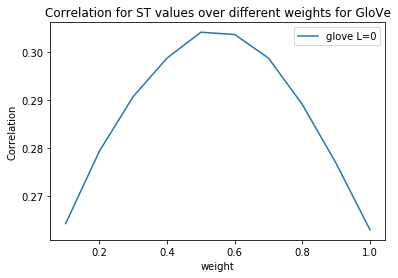

In [89]:
c_start = (0, 0, 0, 1)
c_end = (1, 0.5, 0.5, 1)


for model, weights in tran_scores_all.items():
    
    model_length = len(list(weights.values())[0])
    colors = np.linspace(c_start, c_end, model_length)
    
    for ith_layer in range(model_length):
        
        scores_ith_layer = [w_values[ith_layer] for w_values in weights.values()]
        plt.plot(list(weights.keys()), 
                 scores_ith_layer, 
                 label=f"{model} L={ith_layer}",
                 c=colors[ith_layer]
                )
    
    plt.title(f"Correlation for ST values over different weights for {columnname2modelname(model)}")
    plt.xlabel("weight")
    plt.ylabel("Correlation")
    plt.savefig(f"./plots/weightedST_AllLayers_{model}.pdf")
    plt.show()
    
for model, weights in tran_scores_all.items():
    
    model_length = len(list(weights.values())[0])
    colors = np.linspace(c_start, c_end, model_length)
    
    
    best_score = 0
    best_values = None
    best_layer = None
    for ith_layer in range(model_length):
        
        scores_ith_layer = [w_values[ith_layer] for w_values in weights.values()]
        
        if max(scores_ith_layer) > best_score:
            
            best_score = max(scores_ith_layer)
            best_values = scores_ith_layer
            best_layer = ith_layer
        
    plt.plot(list(weights.keys()), 
             best_values, 
             label=f"{model} L={best_layer}"
            )
    
    plt.title(f"Correlation for ST values over different weights for {columnname2modelname(model)}")
    plt.xlabel("weight")
    plt.ylabel("Correlation")
    plt.legend()
    
    plt.savefig(f"./plots/weightedST_BestLayer_{model}.pdf")
    plt.show()

In [122]:
df = df4

tran_scores_all = {} # model -> weight -> mse

for column in df.columns:
    if '=' in column:
        model_raw, weight_raw = column.split('=')
        model = model_raw[:-2]
        weight = float(weight_raw[:3])
        
        predictions = df[column]
        real = df["TRAN"]
        
        correlation = calc_correlation_layers(real, predictions)

        if model not in tran_scores_all.keys():
            tran_scores_all[model] = {weight:correlation}
        else:
            tran_scores_all[model][weight] = correlation

print(list(tran_scores_all.keys()))

['bertlarge_nocontext_all', 'bertlarge_nocontext_withcls', 'bertlarge_nocontext_nospec', 'bertlarge_contextual', 'bertbase_nocontext_all', 'bertbase_nocontext_withcls', 'bertbase_nocontext_nospec', 'bertbase_contextual', 'glove']


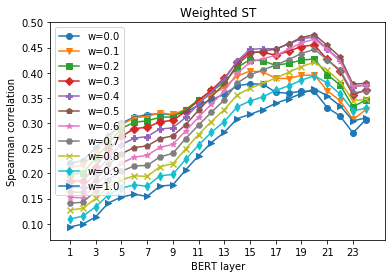

In [140]:
c_start = (0, 0, 0, 1)
c_end = (1, 0.5, 0.5, 1)


model = "bertlarge_contextual"
weights = tran_scores_all[model]
    
model_length = len(list(weights.values())[0])
weight_length = len(weights)
colors = np.linspace(c_start, c_end, weight_length)

#         scores_ith_layer = [w_values[ith_layer] for w_values in weights.values()]
#         plt.plot(list(weights.keys()), 
#                  scores_ith_layer, 
#                  label=f"{model} L={ith_layer}",
#                  c=colors[ith_layer]
#                 )

markers = [
    "o",
    "v",
    "s",
    "D",
    "P",
    "p",
    "*",
    "H",
    "x",
    "d",
    ">",
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
]

linestyles = [
    "solid",
    "dotted",
    "dashed"
]

from itertools import cycle
linestyles = cycle(linestyles)


legend_handles= []
for i, (weight, cors) in enumerate(weights.items()):
    
    
    color = colors[i]
    color_i += 1
    marker = markers[i]
    linestyle = "solid"#next(linestyles)
    label = f"w={weight}"

    plt.plot(range(1, len(cors)+1), cors, label=f"w={weight}",
            linestyle=linestyle)
                #c = colors[ith_layer])
        
    plt.scatter(range(1, len(cors)+1), cors, marker=marker)
        
    
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)

plt.title(f"Weighted ST")
plt.xlabel("BERT layer")
plt.ylabel("Spearman correlation")
plt.xticks(range(1,25, 2))
plt.legend(handles=legend_handles)
plt.savefig(f"./plots/weightedST_AllWeights_{model}-1.pdf")
plt.show()

TODO

* Table 1-indexed
* Axis rename
* Markers for all plots
* Xticks % 2



# Qualitative cases

In [222]:
#LMD
df5 = pd.read_csv("./data/Experiment4_cases.csv", index_col=0)

def list_of_tuples(string):
    a = string.split("),")
    list_of_t = []
    for t in a:
        t_clean = t.replace("[", "").replace("]", "").replace("(", "").replace(")", "")
        t_clean = t_clean.split(",")
        sim1 = float(t_clean[0])
        sim2 = float(t_clean[1])
        list_of_t.append((sim1, sim2))

    return list_of_t

def string_column_to_list(column):
    return column.apply(lambda x: list_of_tuples(x) if x is not np.nan else np.nan)
        

for column in df5.columns:
    if column.endswith("lmd"):

        df5[column] = string_column_to_list(df5[column])
        
display(df5.head())

Compound   left   right      TRAN       LMD  \
0  aboveground  above  ground  6.200000  4.000000   
1      airbase    air    base  4.266667  5.866667   
2     airborne    air   borne  3.857143  3.133333   
3     aircraft    air   craft  4.533333  4.266667   
4     airfield    air   field  4.333333  5.714286   

                         bertlarge_nocontext_all_lmd  \
0  [(0.8553633689880371, 0.766493558883667), (0.8...   
1  [(0.8629100918769836, 0.7972918748855591), (0....   
2  [(0.8068802952766418, 0.7693893909454346), (0....   
3  [(0.8630967140197754, 0.8333138227462769), (0....   
4  [(0.8139641284942627, 0.8318708539009094), (0....   

                     bertlarge_nocontext_withcls_lmd  \
0  [(0.7878209352493286, 0.6502368450164795), (0....   
1  [(0.7906583547592163, 0.692043125629425), (0.8...   
2  [(0.6571942567825317, 0.5995385050773621), (0....   
3  [(0.7519570589065552, 0.7045934200286865), (0....   
4  [(0.6688672304153442, 0.6957418918609619), (0....   

                      bertlarge_nocontext_nospec_lmd  \
0  [(0.6914104223251343, 0.5011245012283325), (0....   
1  [(0.6804603934288025, 0.5604172945022583), (0....   
2  [(0.4284592270851135, 0.3528151512145996), (0....   
3  [(0.5504876375198364, 0.5062901973724365), (0....   
4  [(0.42663371562957764, 0.44461923837661743), (...   

                            bertlarge_contextual_lmd  \
0  [(0.6861472129821777, 0.42199835181236267), (0...   
1  [(0.6584714651107788, 0.5179699659347534), (0....   
2  [(0.3249562978744507, 0.2278953194618225), (0....   
3  [(0.40519294142723083, 0.3681849539279938), (0...   
4  [(0.32519078254699707, 0.29584255814552307), (...   

                          bertbase_nocontext_all_lmd  \
0  [(0.8585644364356995, 0.7091322541236877), (0....   
1  [(0.8291289806365967, 0.7264099717140198), (0....   
2  [(0.7503243684768677, 0.7282289266586304), (0....   
3  [(0.7661418914794922, 0.7619054317474365), (0....   
4  [(0.7429894804954529, 0.7305344939231873), (0....   

                      bertbase_nocontext_withcls_lmd  \
0  [(0.7977891564369202, 0.5745772123336792), (0....   
1  [(0.7624735236167908, 0.6125595569610596), (0....   
2  [(0.5852642059326172, 0.5472837090492249), (0....   
3  [(0.6111093163490295, 0.6123644113540649), (0....   
4  [(0.5784322619438171, 0.5551895499229431), (0....   

                       bertbase_nocontext_nospec_lmd  \
0  [(0.7264259457588196, 0.3980412781238556), (0....   
1  [(0.6615171432495117, 0.4515802264213562), (0....   
2  [(0.3372611999511719, 0.2711847722530365), (0....   
3  [(0.35870423913002014, 0.3786214590072632), (0...   
4  [(0.3199118971824646, 0.2869265377521515), (0....   

                             bertbase_contextual_lmd  \
0  [(0.712077260017395, 0.3519947826862335), (0.6...   
1  [(0.6912102103233337, 0.4525566101074219), (0....   
2  [(0.2512558102607727, 0.17492420971393585), (0...   
3  [(0.30539125204086304, 0.3406662344932556), (0...   
4  [(0.28355345129966736, 0.2060985416173935), (0...   

                                          glove_lmd  
0  [(-0.037727952003479004, -0.002430782187730074)]  
1       [(0.35508203506469727, 0.4459679126739502)]  
2       [(0.3966328203678131, 0.23502422869205475)]  
3       [(0.5790427923202515, 0.45117586851119995)]  
4       [(0.38116925954818726, 0.2523775100708008)]

In [80]:
word= "policeman"
df1[df1["Compound"] == word]

Compound    left right      TRAN       LMD  \
402  policeman  police   man  6.133333  3.066667   

                           bertlarge_nocontext_all_lmd  \
402  [4.736946225166321, 4.863631427288055, 4.90587...   

                       bertlarge_nocontext_withcls_lmd  \
402  [4.524316191673279, 4.733014702796936, 4.80716...   

                        bertlarge_nocontext_nospec_lmd  \
402  [4.144961386919022, 4.415579438209534, 4.46082...   

                              bertlarge_contextual_lmd  \
402  [3.9463521540164948, 4.028313606977463, 4.0341...   

                            bertbase_nocontext_all_lmd  \
402  [4.603647887706757, 4.760271906852722, 4.72370...   

                        bertbase_nocontext_withcls_lmd  \
402  [4.289638698101044, 4.582737684249878, 4.60426...   

                         bertbase_nocontext_nospec_lmd  \
402  [3.8506513833999634, 4.191380441188812, 4.2094...   

                               bertbase_contextual_lmd            glove_lmd  
402  [3.617233484983444, 3.8617345690727234, 3.8381...  [4.410065114498138]

# PLOT LMD CASES

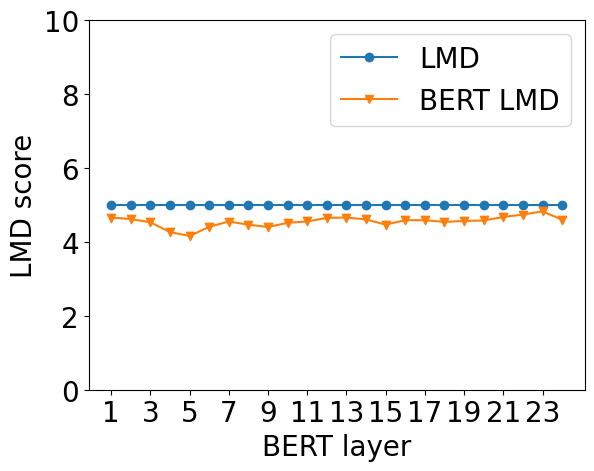

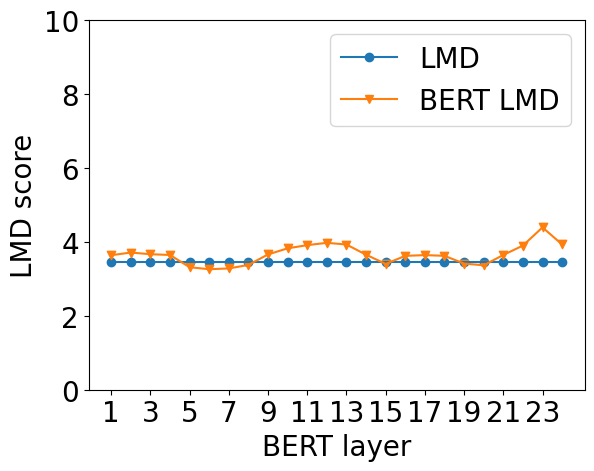

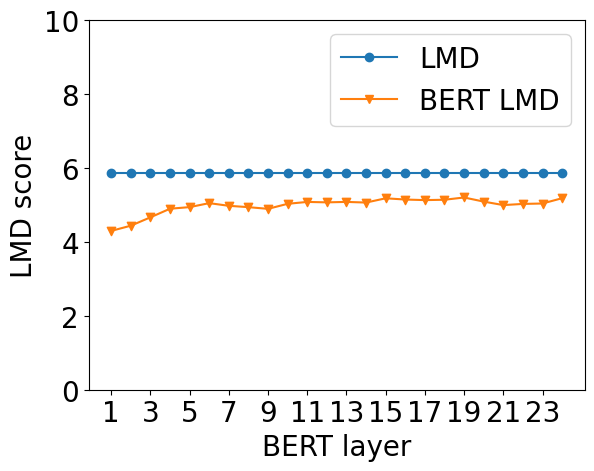

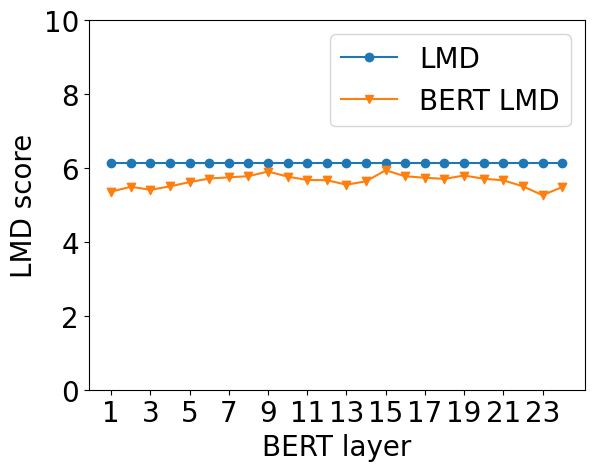

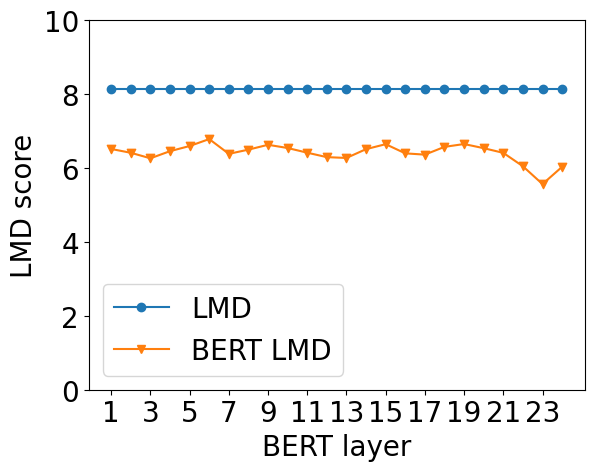

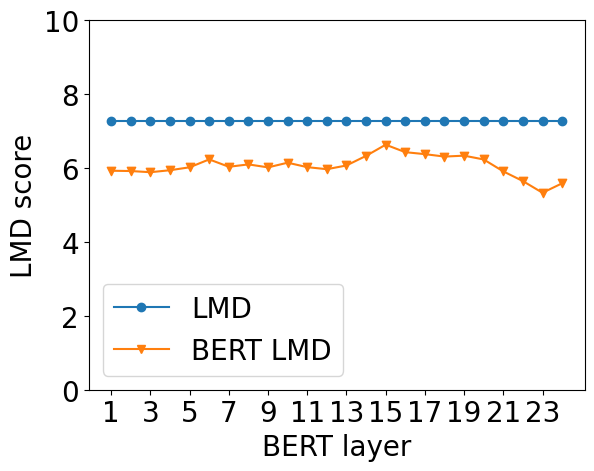

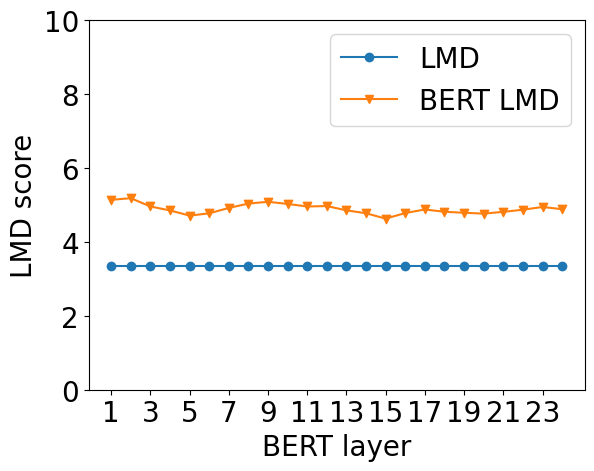

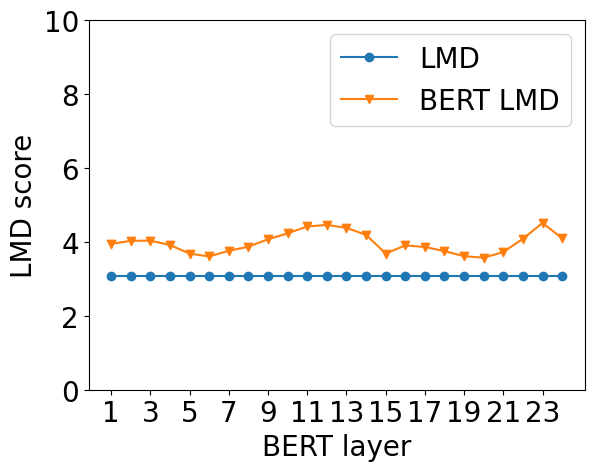

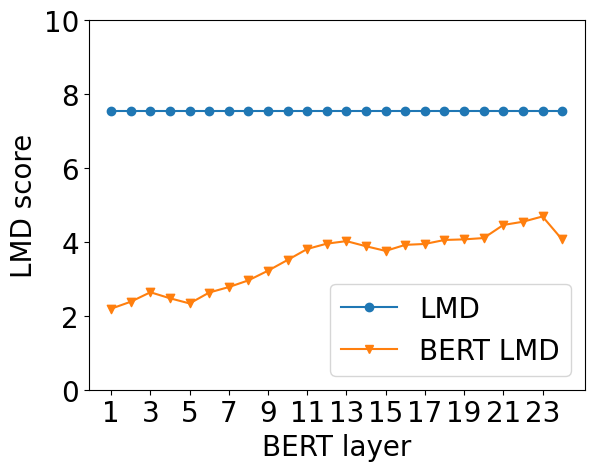

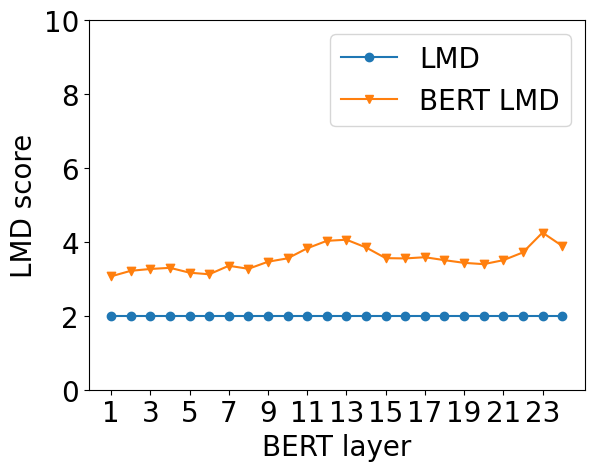

In [315]:
def plot_word_lmd(word):
    
    legend_handles = []
    model = "bertlarge_contextual_lmd"

    row = df1[df1["Compound"] == word]
    # plt.plot(range(1, 25), [x[0] for x in row[model]], label="left sim")
    # plt.plot(range(1, 25), [x[1] for x in row[model]], label="right sim")
    distance = round(np.min(np.abs((row[model].values - row["LMD"].values)[0])), 3)
    
    i = 0
    color = colors[i]
    marker = markers[i]
    linestyle = "solid"#next(linestyles)
    label = f"LMD"
    plt.plot(range(1, 25), [row["LMD"]]*24, label=label, linestyle=linestyle)
    plt.scatter(range(1, 25), [row["LMD"]]*24, marker=marker)
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    
    i = 1
    color = colors[i]
    marker = markers[i]
    linestyle = "solid"#next(linestyles)
    label = f"BERT LMD"
    plt.plot(range(1, 25), row[model].values[0], label="BERT LMD")
    plt.scatter(range(1, 25), row[model].values[0], marker=marker)
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    
#     plt.title(f"LMD comparison for {word} - best distance {distance}")
    
    plt.ylim(0,10)
    plt.xticks(range(1,25,2))
    plt.rc('font', size=20) 
    plt.ylabel("LMD score")
    plt.xlabel("BERT layer")
    plt.legend(handles=legend_handles)
    
    plt.savefig(f"./plots/LMDcase_{word}.pdf", bbox_inches='tight')
    plt.show()
    

words = [
    "sunlight",
    "wartime",
    "airbase",
    "ponytail",
    "handgun",
    "bodyguard",
    "milestone",
    "policeman",
    "muskrat",
    "cheapskate",
]    

for word in words:
    plot_word_lmd(word)

# PLOT ST CASES

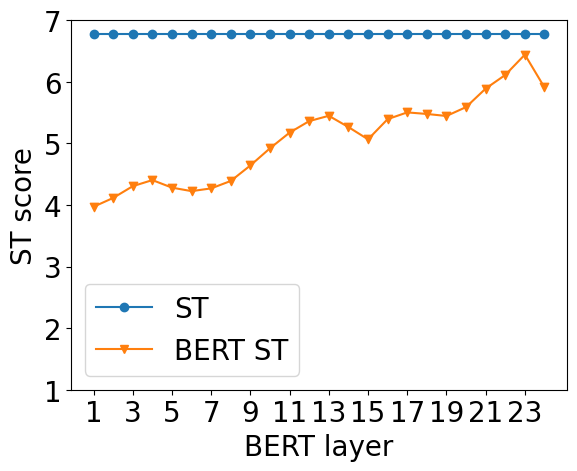

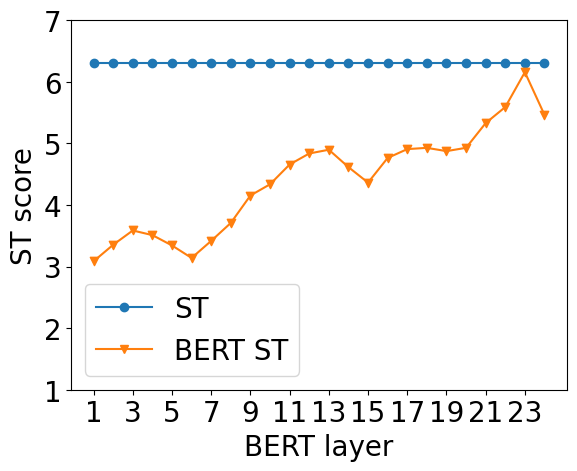

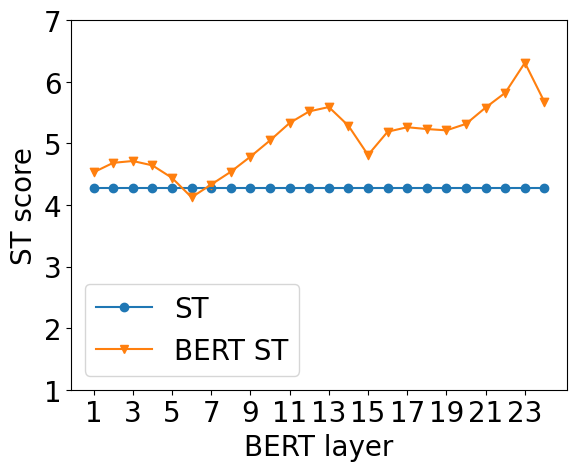

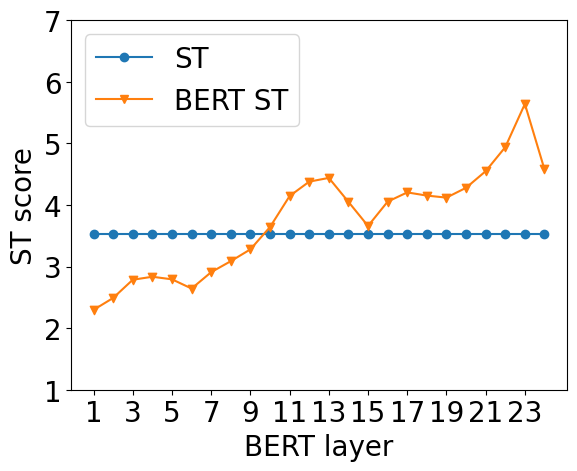

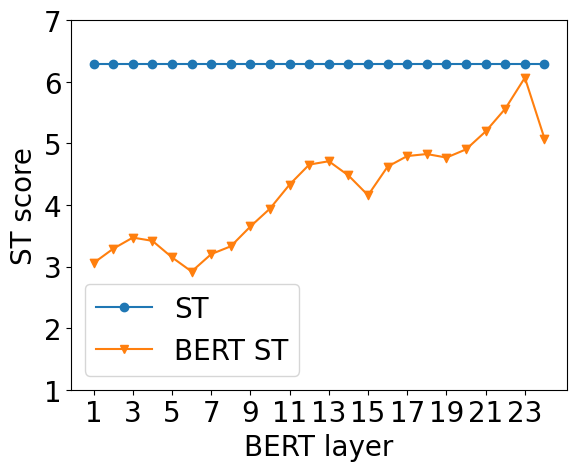

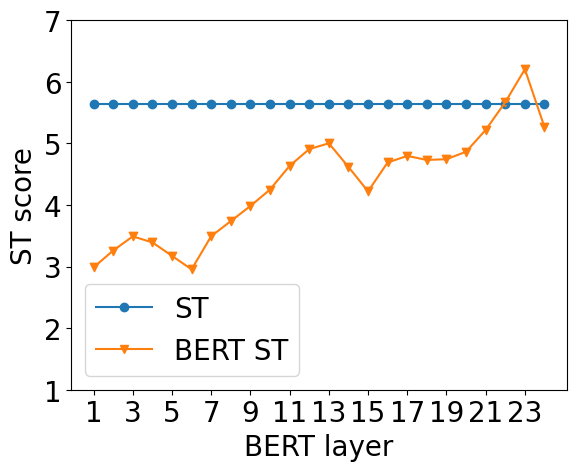

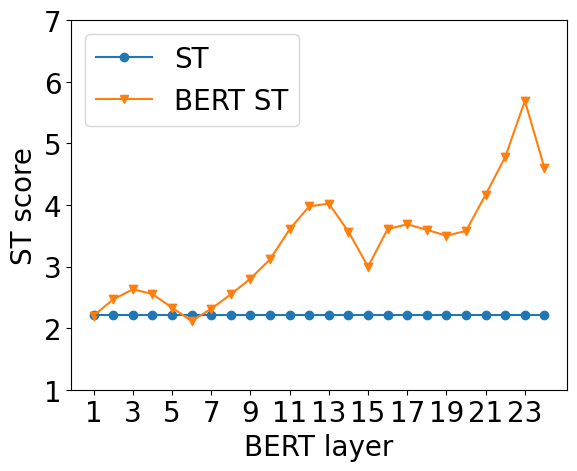

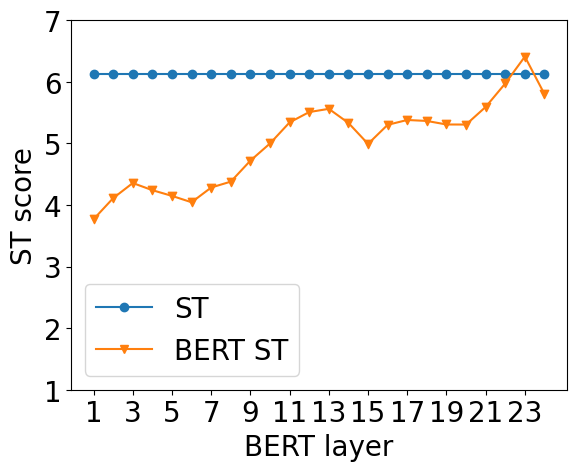

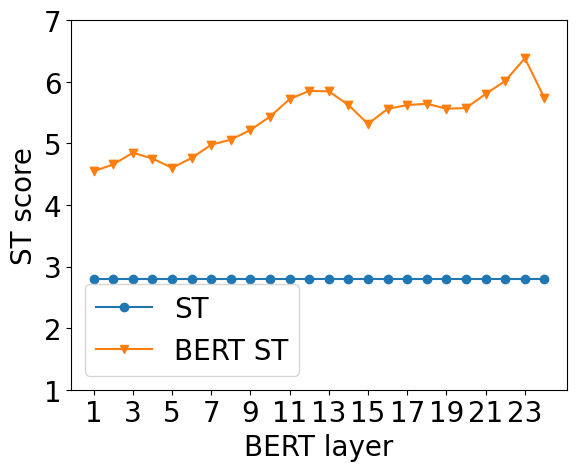

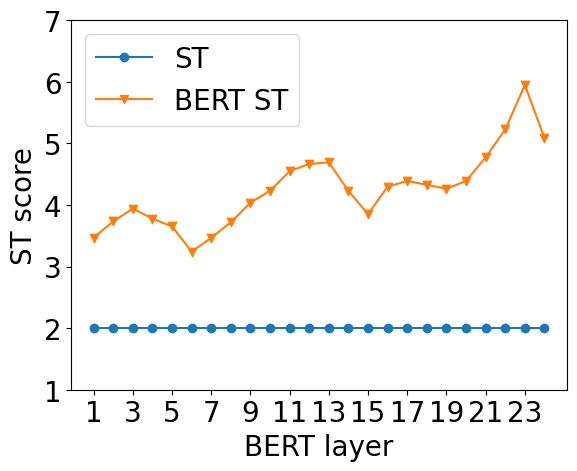

In [320]:
def plot_word_st(word):

    model = "bertlarge_contextual_w=0.5_tran"
    legend_handles = []

    row = df2[df2["Compound"] == word]
    # plt.plot(range(1, 25), [x[0] for x in row[model]], label="left sim")
    # plt.plot(range(1, 25), [x[1] for x in row[model]], label="right sim")
    distance = round(np.min(np.abs((row[model].values - row["TRAN"].values)[0])), 3)
    
    i = 0
    color = colors[i]
    marker = markers[i]
    linestyle = "solid"#next(linestyles)
    label = f"ST"
    plt.plot(range(1, 25), [row["TRAN"]]*24, label=label)
    plt.scatter(range(1, 25), [row["TRAN"]]*24, marker=marker)
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    
    i = 1
    color = colors[i]
    marker = markers[i]
    linestyle = "solid"#next(linestyles)
    label = f"BERT ST"
    plt.plot(range(1, 25), row[model].values[0], label=label)
    plt.scatter(range(1, 25), row[model].values[0], marker=marker)
    # For legend
    legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                              linestyle = linestyle,
                              label=label)
    legend_handles.append(legend_handle)
    
#     plt.title(f"ST comparison for {word} - best distance {distance}")
    
    plt.ylim(1,7)
    plt.xticks(range(1,25,2))
    
    plt.ylabel("ST score")
    plt.xlabel("BERT layer")
    plt.rc('font', size=20) 
    plt.legend(handles=legend_handles)
    
    plt.savefig(f"./plots/STcase_{word}.pdf", bbox_inches='tight')
    plt.show()
    

words = [
    "sunlight",
    "wartime",
    "airbase",
    "ponytail",
    "handgun",
    "bodyguard",
    "milestone",
    "policeman",
    "muskrat",
    "cheapskate",
]    

for word in words:
    plot_word_st(word)

In [108]:

display((df2.copy()
 .pipe(min_for_each_column)
).describe())
display((df2.copy()
 .pipe(max_for_each_column)
).describe())
display((df2.copy()
 .pipe(mean_for_each_column)
).describe())

df2

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            4.748217   
std      1.198767    1.432273                            0.584676   
min      1.400000    1.400000                            2.625325   
25%      3.642857    4.142857                            4.313587   
50%      4.571429    5.133333                            4.713235   
75%      5.571429    6.066667                            5.158628   
max      6.769231    8.933333                            6.041756   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             4.789276                            4.827543   
std                              0.564385                            0.548892   
min                              2.696343                            2.767361   
25%                              4.379352                            4.437211   
50%                              4.757402                            4.790111   
75%                              5.194900                            5.237042   
max                              6.006977                            6.002963   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             4.862795                            4.893316   
std                              0.538016                            0.531269   
min                              2.838379                            2.909397   
25%                              4.482690                            4.513092   
50%                              4.822893                            4.857581   
75%                              5.249683                            5.269296   
max                              6.051948                            6.100933   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             4.918157                            4.937326   
std                              0.528696                            0.529510   
min                              2.980415                            3.051433   
25%                              4.549267                            4.579583   
50%                              4.887329                            4.928000   
75%                              5.301312                            5.326162   
max                              6.119228                            6.127529   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             4.952296  ...          1.884890   
std                              0.534388  ...          0.978229   
min                              3.047212  ...         -1.046719   
25%                              4.594278  ...          1.199456   
50%                              4.952520  ...          1.767363   
75%                              5.346785  ...          2.500513   
max                              6.172277  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            6.363920   
std      1.198767    1.432273                            0.222789   
min      1.400000    1.400000                            5.707348   
25%      3.642857    4.142857                            6.218360   
50%      4.571429    5.133333                            6.351205   
75%      5.571429    6.066667                            6.532765   
max      6.769231    8.933333                            6.825625   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             6.373678                            6.384054   
std                              0.213844                            0.205668   
min                              5.764973                            5.822599   
25%                              6.233921                            6.249702   
50%                              6.361924                            6.372514   
75%                              6.535211                            6.536731   
max                              6.822668                            6.828833   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             6.395137                            6.406911   
std                              0.197983                            0.190991   
min                              5.880224                            5.900838   
25%                              6.267289                            6.289397   
50%                              6.385065                            6.399430   
75%                              6.544338                            6.550198   
max                              6.836636                            6.844439   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             6.419474                            6.433462   
std                              0.184639                            0.178644   
min                              5.917197                            5.933556   
25%                              6.307444                            6.328519   
50%                              6.415626                            6.435742   
75%                              6.550088                            6.555914   
max                              6.852242                            6.860046   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             6.448780  ...          1.884890   
std                              0.173049  ...          0.978229   
min                              5.949915  ...         -1.046719   
25%                              6.351628  ...          1.199456   
50%                              6.452112  ...          1.767363   
75%                              6.563757  ...          2.500513   
max                              6.867849  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

TRAN         LMD  bertlarge_nocontext_all_w=0.0_tran  \
count  628.000000  628.000000                          627.000000   
mean     4.536891    5.075251                            5.737439   
std      1.198767    1.432273                            0.370199   
min      1.400000    1.400000                            4.728353   
25%      3.642857    4.142857                            5.496591   
50%      4.571429    5.133333                            5.698844   
75%      5.571429    6.066667                            5.985926   
max      6.769231    8.933333                            6.598392   

       bertlarge_nocontext_all_w=0.1_tran  bertlarge_nocontext_all_w=0.2_tran  \
count                          627.000000                          627.000000   
mean                             5.755408                            5.773376   
std                              0.355174                            0.341810   
min                              4.786912                            4.828504   
25%                              5.526916                            5.554555   
50%                              5.721912                            5.742982   
75%                              5.991165                            6.006526   
max                              6.583429                            6.568466   

       bertlarge_nocontext_all_w=0.3_tran  bertlarge_nocontext_all_w=0.4_tran  \
count                          627.000000                          627.000000   
mean                             5.791345                            5.809313   
std                              0.330310                            0.320874   
min                              4.870095                            4.879389   
25%                              5.581062                            5.604348   
50%                              5.766738                            5.791627   
75%                              6.018071                            6.010985   
max                              6.576259                            6.593753   

       bertlarge_nocontext_all_w=0.5_tran  bertlarge_nocontext_all_w=0.6_tran  \
count                          627.000000                          627.000000   
mean                             5.827282                            5.845250   
std                              0.313688                            0.308909   
min                              4.882782                            4.886175   
25%                              5.628832                            5.643879   
50%                              5.816359                            5.842677   
75%                              6.030315                            6.044228   
max                              6.611246                            6.628739   

       bertlarge_nocontext_all_w=0.7_tran  ...  glove_w=0.1_tran  \
count                          627.000000  ...        623.000000   
mean                             5.863219  ...          1.884890   
std                              0.306650  ...          0.978229   
min                              4.889568  ...         -1.046719   
25%                              5.660575  ...          1.199456   
50%                              5.859455  ...          1.767363   
75%                              6.073425  ...          2.500513   
max                              6.646233  ...          5.447989   

       glove_w=0.2_tran  glove_w=0.3_tran  glove_w=0.4_tran  glove_w=0.5_tran  \
count        623.000000        623.000000        623.000000        623.000000   
mean           1.888781          1.892672          1.896562          1.900453   
std            0.928615          0.891618          0.868849          0.861438   
min           -0.939948         -0.833178         -0.726407         -0.619636   
25%            1.208174          1.252896          1.264393          1.285032   
50%            1.798863          1.831621          1.847423          1.818463   
75%            2.4665

Compound   left   right      TRAN       LMD  \
0    aboveground  above  ground  6.200000  4.000000   
1        airbase    air    base  4.266667  5.866667   
2       airborne    air   borne  3.857143  3.133333   
3       aircraft    air   craft  4.533333  4.266667   
4       airfield    air   field  4.333333  5.714286   
..           ...    ...     ...       ...       ...   
624     wordplay   word    play  4.928571  3.533333   
625    worldwide  world    wide  4.928571  3.066667   
626   wristwatch  wrist   watch  6.266667  6.333333   
627    yardstick  yards    tick  5.866667  5.333333   
628     yearbook   year    book  5.384615  5.933333   

                    bertlarge_nocontext_all_w=0.0_tran  \
0    [5.598961353302002, 5.939782500267029, 6.23188...   
1    [5.7837512493133545, 5.926817059516907, 6.0935...   
2    [5.616336345672607, 5.969049334526062, 6.28187...   
3    [5.999882936477661, 6.420726180076599, 6.59339...   
4    [5.9912251234054565, 6.26756489276886, 6.47411...   
..                                                 ...   
624  [5.799152493476868, 5.95989727973938, 6.191805...   
625  [5.860994577407837, 6.23165762424469, 6.496663...   
626  [5.70931351184845, 5.824675679206848, 6.103828...   
627  [4.982968807220459, 5.469679236412048, 5.92262...   
628  [5.926134347915649, 6.211674809455872, 6.46713...   

                    bertlarge_nocontext_all_w=0.1_tran  \
0    [5.652283239364625, 5.981840074062348, 6.26173...   
1    [5.82312217950821, 5.9639852166175835, 6.11654...   
2    [5.6388308882713325, 5.990476930141449, 6.2996...   
3    [6.017752671241761, 6.430564522743225, 6.59956...   
4    [5.9804810881614685, 6.269351851940154, 6.4791...   
..                                                 ...   
624  [5.848029851913453, 6.001881933212281, 6.22334...   
625  [5.898016464710236, 6.254869496822357, 6.51224...   
626  [5.764572167396546, 5.873830163478852, 6.13815...   
627  [5.105232727527619, 5.562675249576568, 5.98742...   
628  [5.920389449596405, 6.20978217124939, 6.464379...   

                    bertlarge_nocontext_all_w=0.2_tran  \
0    [5.705605125427247, 6.023897647857666, 6.29157...   
1    [5.862493109703064, 6.001153373718262, 6.13948...   
2    [5.661325430870057, 6.011904525756837, 6.31733...   
3    [6.03562240600586, 6.440402865409852, 6.605740...   
4    [5.969737052917481, 6.2711388111114506, 6.4841...   
..                                                 ...   
624  [5.896907210350037, 6.043866586685181, 6.25488...   
625  [5.935038352012635, 6.278081369400024, 6.52781...   
626  [5.819830822944642, 5.922984647750855, 6.17247...   
627  [5.227496647834778, 5.655671262741089, 6.05222...   
628  [5.91464455127716, 6.207889533042908, 6.461620...   

                    bertlarge_nocontext_all_w=0.3_tran  \
0    [5.758927011489868, 6.065955221652985, 6.32142...   
1    [5.901864039897919, 6.038321530818939, 6.16243...   
2    [5.68381997346878, 6.033332121372222, 6.335072...   
3    [6.053492140769958, 6.450241208076477, 6.61191...   
4    [5.9589930176734915, 6.272925770282745, 6.4892...   
..                                                 ...   
624  [5.945784568786621, 6.085851240158082, 6.28642...   
625  [5.972060239315033, 6.301293241977692, 6.54339...   
626  [5.875089478492736, 5.972139132022857, 6.20680...   
627  [5.349760568141937, 5.748667275905609, 6.11702...   
628  [5.908899652957917, 6.205996894836425, 6.45886...   

                    bertlarge_nocontext_all_w=0.4_tran  ...  \
0    [5.8122488975524895, 6.108012795448303, 6.3512...  ...   
1    [5.941234970092774, 6.075489687919617, 6.18538...  ...   
2    [5.706314516067504, 6.0547597169876095, 6.3528...  ...   
3    [6.071361875534057, 6.460079550743103, 6.61808...  ...   
4    [5.948248982429504, 6.274712729454041, 6.49427...  ...   
..                                                 ...  ...   
624  [5.994661927223206, 6.127835893630982, 6.31797...  ...   
625  [6.009082126617432, 6.324505114555359, 6.55897... 

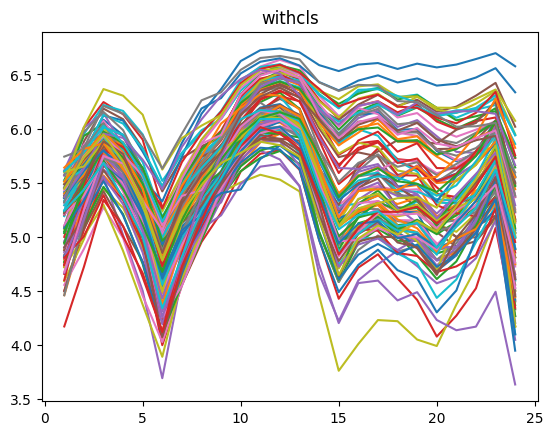

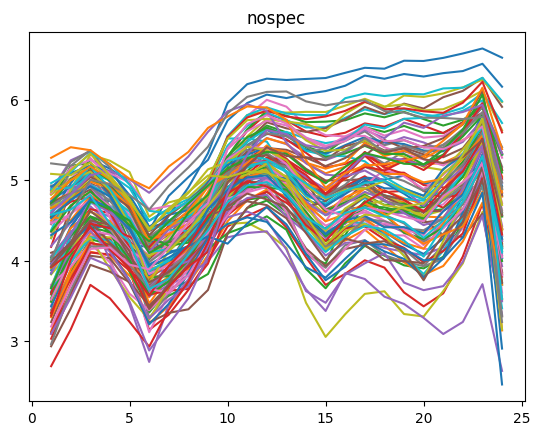

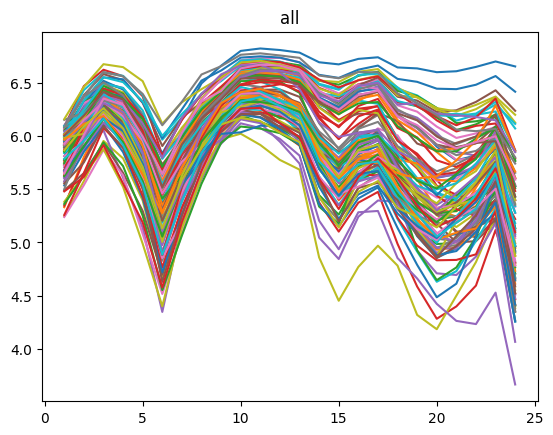

In [199]:
for akweword in ["withcls", "nospec", "all"]:
    word= "ponytail"
    df2[df2["Compound"] == word]
    # print(df2[model])

    for i in range(100):
    #     i = df2[df2["Compound"] == word].index[0] - 1

        row1 = df2.iloc[i]
        model = f"bertlarge_nocontext_{akweword}_w=0.5_tran"

    #     print(row1)
        # plt.plot(range(1, 25), [x[0] for x in row[model]], label="left sim")
        # plt.plot(range(1, 25), [x[1] for x in row[model]], label="right sim")

    #     print(round(np.min(np.abs(row1[model] - row1["TRAN"])), 3))
    #     plt.plot(range(1, 25), [row1["TRAN"]]*24, label="TRAN")
        plt.plot(range(1, 25), row1[model], label="BERT TRAN")

    # plt.legend()
    plt.title(f"{akweword}")
    plt.savefig("./plots/1StrangeTran.pdf")
    plt.show()

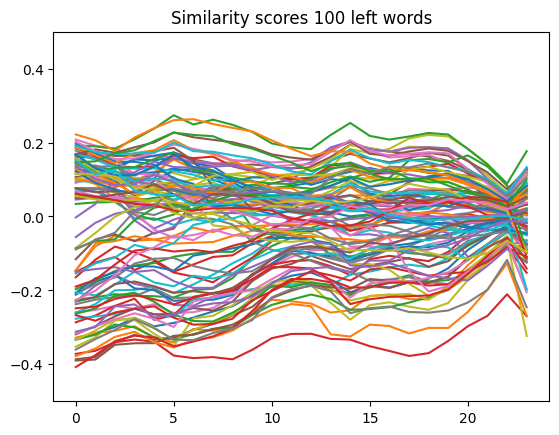

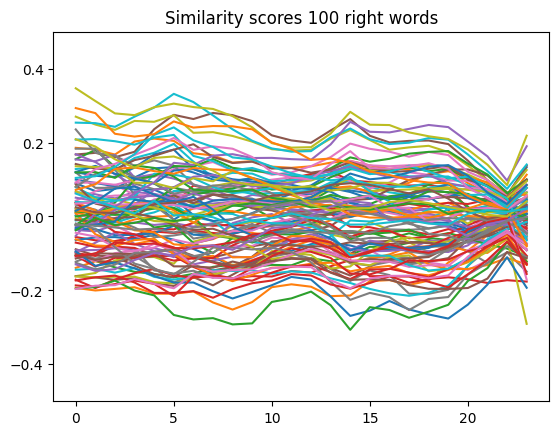

In [160]:
sims1 = df5["bertlarge_contextual_lmd"].apply(lambda x: [y[0] for y in x])

for i in range(100):
    
    average = np.mean([list(s) for s in sims1], axis=0)
    
    normalized = s - average
    plt.plot(s - average)
    
plt.ylim(-0.5,0.5)
plt.title("Similarity scores 100 left words")
plt.savefig("./plots/1StrangeLeftSim.pdf")
plt.show()

sims2 = df5["bertlarge_contextual_lmd"].apply(lambda x: [y[1] for y in x])

for i in range(100):
    
    average = np.mean([list(s) for s in sims2], axis=0)
    s = sims2.iloc[i]
    
    normalized = s - average
    plt.plot()
    
plt.ylim(-0.5,0.5)
plt.title("Similarity scores 100 right words")
plt.savefig("./plots/1StrangeRightSim.pdf")
plt.show()

# Waar ik nu ben

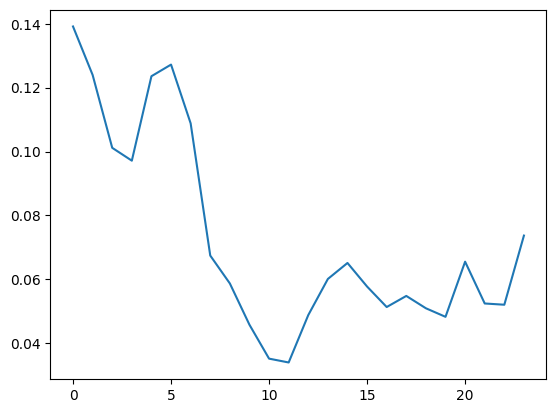

In [221]:
model = "bertlarge_nocontext_withcls_lmd"

df5 = df5.dropna()

new_df = pd.DataFrame()

new_df["Compound"] = df5["Compound"]
new_df["Tran"] = df5["TRAN"]
new_df["Sims1"] = df5[model].apply(lambda x: [y[0] if y is not np.nan else np.nan for y in x])
new_df["Sims2"] = df5[model].apply(lambda x: [y[1] if y is not np.nan else np.nan for y in x])

    
average1 = np.mean([list(s) for s in new_df["Sims1"]], axis=0)
average2 = np.mean([list(s) for s in new_df["Sims2"]], axis=0)

def make_tran(row):
    
    s1 = row["Sims1"]
    s2 = row["Sims2"]
    
    # Normalize
    s1 = s1 - average1
    s2 = s2 - average2
    
    average_sims = np.mean([s1, s2], axis = 0)
    
    tran_value = 7 * (average_sims + 0.5)
    
    return tran_value

new_df["Tran_calc"] = new_df.apply(make_tran, axis=1)

new_df["Tran"], new_df["Tran_calc"]

corr = []
for i in range(24):
    c = spearmanr(new_df["Tran"], new_df["Tran_calc"].apply(lambda x: x[i])).correlation
    
    corr.append(c)
    
    
plt.plot(corr)

plt.show()

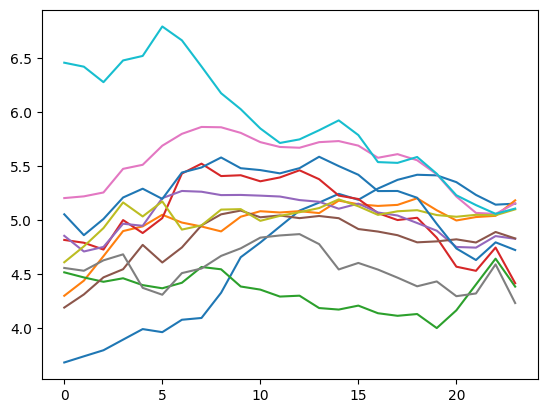

In [137]:
i = 0
for sim1, sim2 in zip(sims1, sims2):
    if i > 10:
        
        break
    lmd = 5 + (np.array(sim2) - np.array(sim1)) * 5
    
    plt.plot(lmd)
    i += 1
    
plt.show()

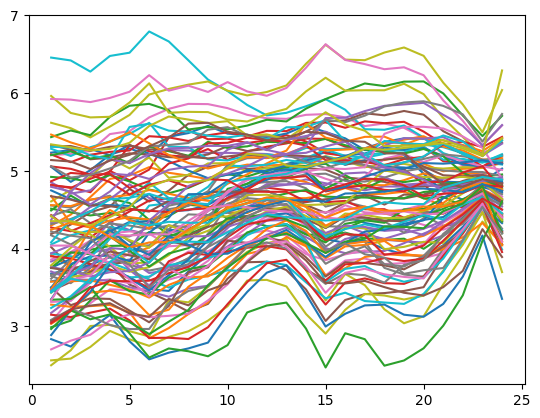

In [128]:

# word= "ponytail"
# df2[df2["Compound"] == word]
# print(df2[model])

for i in range(100):
#     i = df2[df2["Compound"] == word].index[0] - 1

    row1 = df1.iloc[i]
    model = "bertlarge_contextual_lmd"

#     print(row1)
    # plt.plot(range(1, 25), [x[0] for x in row[model]], label="left sim")
    # plt.plot(range(1, 25), [x[1] for x in row[model]], label="right sim")

#     print(round(np.min(np.abs(row1[model] - row1["TRAN"])), 3))
#     plt.plot(range(1, 25), [row1["TRAN"]]*24, label="TRAN")
    plt.plot(range(1, 25), row1[model], label="BERT LMD")

# plt.legend()
plt.savefig("./plots/1StrangeLMD.pdf")
plt.show()

# PLOTS IN THE PAPER

Best correlation for bertlarge_nocontext_all_lmd             : 0.247 L=21
Best correlation for bertlarge_nocontext_withcls_lmd         : 0.244 L=21
Best correlation for bertlarge_nocontext_nospec_lmd          : 0.247 L=21
Best correlation for bertlarge_contextual_lmd                : 0.586 L=21
Best correlation for bertbase_nocontext_all_lmd              : 0.384 L=11
Best correlation for bertbase_nocontext_withcls_lmd          : 0.385 L=11
Best correlation for bertbase_nocontext_nospec_lmd           : 0.375 L=11
Best correlation for bertbase_contextual_lmd                 : 0.563 L=10
Best correlation for glove_lmd                               : 0.541


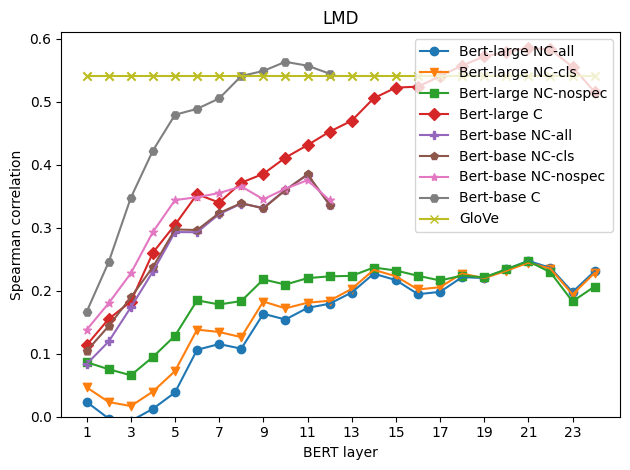

In [299]:

import matplotlib.lines as mlines

plot_columns = [
                     "bertlarge_nocontext_all_lmd",
                     "bertlarge_nocontext_withcls_lmd",
                     "bertlarge_nocontext_nospec_lmd",
                     "bertlarge_contextual_lmd",
                     "bertbase_nocontext_all_lmd",
                     "bertbase_nocontext_withcls_lmd",
                     "bertbase_nocontext_nospec_lmd",
                     "bertbase_contextual_lmd",
                     "glove_lmd"
                    ]


markers = [
    "o",
    "v",
    "s",
    "D",
    "P",
    "p",
    "*",
    "H",
    "x",
    "d",
    ">",
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
]

linestyles = [
    "solid",
    "dotted",
    "dashed"
]

color_i = 0
i = 0
legend_handles = []
for column in plot_columns:


    if "glove" in column:

        predictions = df1[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
        real = df1["LMD"]

        res = calc_correlation(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.max(res), 3)}")

        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)


        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)

        plt.plot(range(1, n_layers+1), [res] * n_layers, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), [res] * n_layers, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


    else:
    
        predictions = df1[column]
        real = df1["LMD"]

        res = calc_correlation_layers(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.max(res), 3)} L={np.argmax(res)+1}")

        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)
        
        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)

        plt.plot(range(1, n_layers+1), res, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), res, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


plt.title(f"LMD")
plt.xlabel("BERT layer")
plt.ylabel(f"Spearman correlation")

plt.ylim(0,0.61)
plt.xticks(range(1,25,2))

plt.legend(handles=legend_handles)
plt.tight_layout()
plt.savefig(f"./plots/Final_LMD_correlation_bert.pdf")
plt.show()


Best correlation for bertlarge_nocontext_all_w=0.5_tran      : 0.113 L=1
Best correlation for bertlarge_nocontext_withcls_w=0.5_tran  : 0.139 L=1
Best correlation for bertlarge_nocontext_nospec_w=0.5_tran   : 0.195 L=6
Best correlation for bertlarge_contextual_w=0.5_tran         : 0.476 L=20
Best correlation for bertbase_nocontext_all_w=0.5_tran       : 0.234 L=1
Best correlation for bertbase_nocontext_withcls_w=0.5_tran   : 0.275 L=3
Best correlation for bertbase_nocontext_nospec_w=0.5_tran    : 0.316 L=5
Best correlation for bertbase_contextual_w=0.5_tran          : 0.415 L=9
Best correlation for glove_w=0.5_tran                        : 0.304


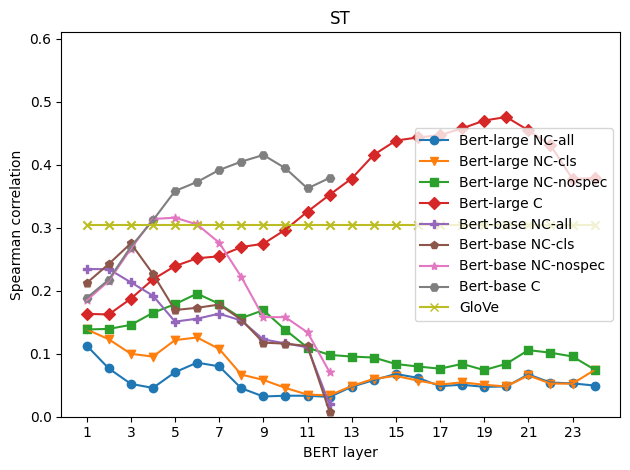

In [297]:

import matplotlib.lines as mlines

plot_columns = [
                     "bertlarge_nocontext_all_w=0.5_tran",
                     "bertlarge_nocontext_withcls_w=0.5_tran",
                     "bertlarge_nocontext_nospec_w=0.5_tran",
                     "bertlarge_contextual_w=0.5_tran",
                     "bertbase_nocontext_all_w=0.5_tran",
                     "bertbase_nocontext_withcls_w=0.5_tran",
                     "bertbase_nocontext_nospec_w=0.5_tran",
                     "bertbase_contextual_w=0.5_tran",
                     "glove_w=0.5_tran"
                    ]


markers = [
    "o",
    "v",
    "s",
    "D",
    "P",
    "p",
    "*",
    "H",
    "x",
    "d",
    ">",
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
]

linestyles = [
    "solid",
    "dotted",
    "dashed"
]

color_i = 0
i = 0
legend_handles = []

for column in plot_columns:


    if "glove" in column:

        predictions = df2[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
        real = df2["TRAN"]

        res = calc_correlation(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.max(res), 3)}")

        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)


        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)

        plt.plot(range(1, n_layers+1), [res] * n_layers, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), [res] * n_layers, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


    else:
    
        predictions = df2[column]
        real = df2["TRAN"]

        res = calc_correlation_layers(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.max(res), 3)} L={np.argmax(res)+1}")

        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)
        
        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)

        plt.plot(range(1, n_layers+1), res, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), res, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


plt.title(f"ST")
plt.xlabel("BERT layer")
plt.ylabel(f"Spearman correlation")

plt.ylim(0,0.61)
plt.xticks(range(1,25,2))

plt.legend(handles=legend_handles)
plt.tight_layout()
plt.savefig(f"./plots/Final_ST_correlation_bert.pdf")
plt.show()


Best correlation for bertlarge_nocontext_all_lmd             : 1.105 L=21
Best correlation for bertlarge_nocontext_withcls_lmd         : 1.107 L=22
Best correlation for bertlarge_nocontext_nospec_lmd          : 1.13 L=21
Best correlation for bertlarge_contextual_lmd                : 0.966 L=21
Best correlation for bertbase_nocontext_all_lmd              : 1.072 L=11
Best correlation for bertbase_nocontext_withcls_lmd          : 1.071 L=11
Best correlation for bertbase_nocontext_nospec_lmd           : 1.095 L=11
Best correlation for bertbase_contextual_lmd                 : 0.991 L=11
Best distance for glove_lmd                               : 0.945


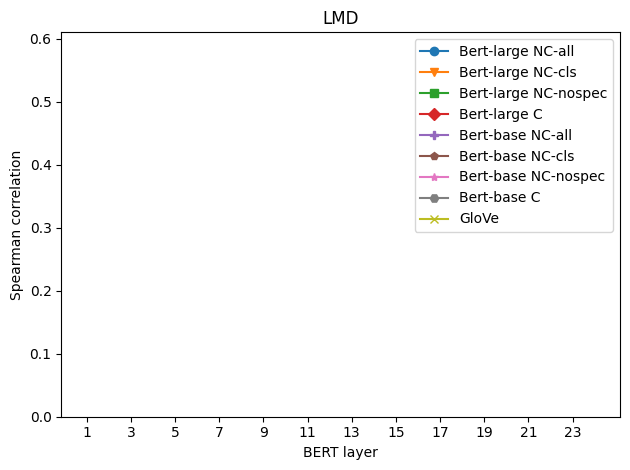

In [300]:

import matplotlib.lines as mlines

plot_columns = [
                     "bertlarge_nocontext_all_lmd",
                     "bertlarge_nocontext_withcls_lmd",
                     "bertlarge_nocontext_nospec_lmd",
                     "bertlarge_contextual_lmd",
                     "bertbase_nocontext_all_lmd",
                     "bertbase_nocontext_withcls_lmd",
                     "bertbase_nocontext_nospec_lmd",
                     "bertbase_contextual_lmd",
                     "glove_lmd"
                    ]


markers = [
    "o",
    "v",
    "s",
    "D",
    "P",
    "p",
    "*",
    "H",
    "x",
    "d",
    ">",
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
]

linestyles = [
    "solid",
    "dotted",
    "dashed"
]

color_i = 0
i = 0
legend_handles = []
for column in plot_columns:


    if "glove" in column:

        predictions = df1[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
        real = df1["LMD"]

        res = calc_distance(real, predictions)
        print(f"Best distance for {column: <40}: {round(np.min(res), 3)}")

        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)


        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)

        plt.plot(range(1, n_layers+1), [res] * n_layers, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), [res] * n_layers, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


    else:
    
        predictions = df1[column]
        real = df1["LMD"]

        res = calc_distance_layers(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.min(res), 3)} L={np.argmin(res)+1}")

        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)
        
        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)

        plt.plot(range(1, n_layers+1), res, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), res, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


plt.title(f"LMD")
plt.xlabel("BERT layer")
plt.ylabel(f"Spearman correlation")

plt.ylim(0,0.61)
plt.xticks(range(1,25,2))

plt.legend(handles=legend_handles)
plt.tight_layout()
# plt.savefig(f"./plots/Final_LMD_correlation_bert.pdf")
plt.show()


Best correlation for bertlarge_nocontext_all_w=0.5_tran      : 1.118 L=24
Best correlation for bertlarge_nocontext_withcls_w=0.5_tran  : 1.024 L=6
Best correlation for bertlarge_nocontext_nospec_w=0.5_tran   : 0.989 L=9
Best correlation for bertlarge_contextual_w=0.5_tran         : 0.876 L=19
Best correlation for bertbase_nocontext_all_w=0.5_tran       : 1.129 L=10
Best correlation for bertbase_nocontext_withcls_w=0.5_tran   : 0.989 L=1
Best correlation for bertbase_nocontext_nospec_w=0.5_tran    : 0.953 L=6
Best correlation for bertbase_contextual_w=0.5_tran          : 0.899 L=9
Best correlation for glove_w=0.5_tran                        : 2.657


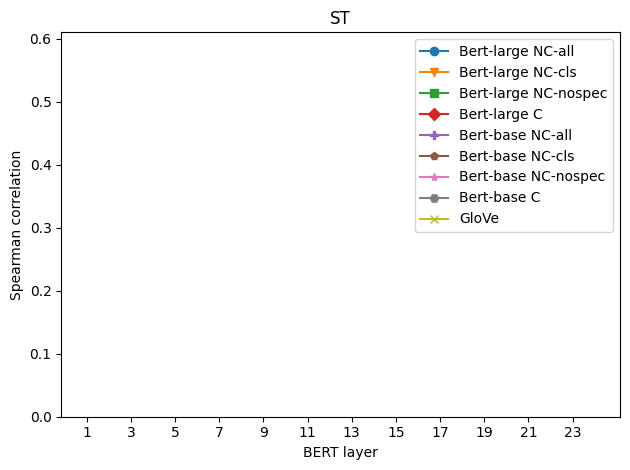

In [302]:

import matplotlib.lines as mlines

plot_columns = [
                     "bertlarge_nocontext_all_w=0.5_tran",
                     "bertlarge_nocontext_withcls_w=0.5_tran",
                     "bertlarge_nocontext_nospec_w=0.5_tran",
                     "bertlarge_contextual_w=0.5_tran",
                     "bertbase_nocontext_all_w=0.5_tran",
                     "bertbase_nocontext_withcls_w=0.5_tran",
                     "bertbase_nocontext_nospec_w=0.5_tran",
                     "bertbase_contextual_w=0.5_tran",
                     "glove_w=0.5_tran"
                    ]


markers = [
    "o",
    "v",
    "s",
    "D",
    "P",
    "p",
    "*",
    "H",
    "x",
    "d",
    ">",
]

colors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
    "C9",
    "C10",
]

linestyles = [
    "solid",
    "dotted",
    "dashed"
]

color_i = 0
i = 0
legend_handles = []

for column in plot_columns:


    if "glove" in column:

        predictions = df2[column].apply(lambda x: x[0] if x is not np.nan else np.nan)
        real = df2["TRAN"]

        res = calc_distance(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.min(res), 3)}")

        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)


        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)

        plt.plot(range(1, n_layers+1), [res] * n_layers, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), [res] * n_layers, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


    else:
    
        predictions = df2[column]
        real = df2["TRAN"]

        res = calc_distance_layers(real, predictions)
        print(f"Best correlation for {column: <40}: {round(np.min(res), 3)} L={np.argmin(res)+1}")

        color = colors[i]
        color_i += 1
        marker = markers[i]
        linestyle = "solid"
        label = columnname2modelname(column)
        
        n_layers = 24 * ("base" not in column) + 12 * ("base" in column)

        plt.plot(range(1, n_layers+1), res, label=label,
                linestyle=linestyle)
                    #c = colors[ith_layer])

        plt.scatter(range(1, n_layers+1), res, marker=marker)


        # For legend
        legend_handle = mlines.Line2D([], [], color=color, marker=marker,
                                  linestyle = linestyle,
                                  label=label)
        legend_handles.append(legend_handle)
        
        i += 1


plt.title(f"ST")
plt.xlabel("BERT layer")
plt.ylabel(f"Spearman correlation")

plt.ylim(0,0.61)
plt.xticks(range(1,25,2))

plt.legend(handles=legend_handles)
plt.tight_layout()
# plt.savefig(f"./plots/Final_ST_correlation_bert.pdf")
plt.show()
